# Mod 4 - Natural Language Processing Project

Please fill out:
* Student name: Max Steele
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: <a href="https://zero731.github.io/model_selection_validation_and_tuning">Model Selection, Validation, and Tuning</a>

<font size=3rem>
    
- **[Introduction](#Introduction)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[INTERPRET](#INTERPRET)**<br>
- **[Conclusions/Recommendations](#Conclusions/Recommendations)<br>**
</font>

# Introduction

# OBTAIN

In [1]:
import numpy as np
np.random.seed(319)

In [2]:
from project_functions import *

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from tzlocal import get_localzone

In [230]:
## Import and preview dataset
full_df = pd.read_csv('Data/orig_labeled_data.csv', index_col=0)
full_df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [231]:
## View info for records and columns
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [232]:
## Create column that translates number codes into class names to make things easier to keep track of
# Create a dict of values to be mapped
class_dict = {0: 'hate speech', 1: 'offensive', 2: 'neither'}

# Replace keys (0, 1, and 2) with corresponding values and preview dataset
full_df['class_code'] = full_df['class']
full_df['class'] = full_df['class_code'].map(class_dict)
full_df.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_code
0,3,0,0,3,neither,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,3,0,3,0,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,3,0,3,0,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,0,2,1,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,6,0,6,0,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [233]:
## Print value counts and percentages of classes for full dataset
check_unique(full_df, 'class') 
# Note: pretty extreme imbalance of classes

,count,%
offensive,19190,0.774321
neither,4163,0.167978
hate speech,1430,0.057701


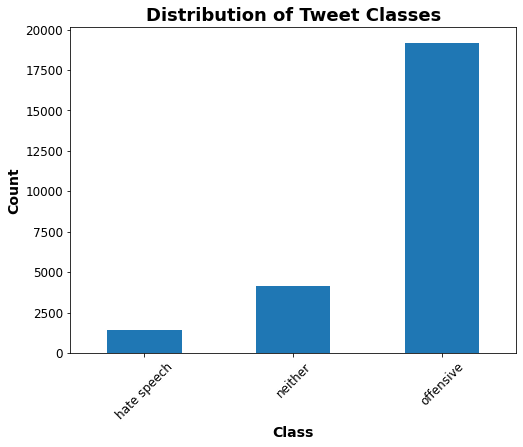

In [234]:
plt.figure(figsize=(8,6))
full_df.groupby('class').tweet.count().plot.bar(ylim=0)
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Tweet Classes', fontsize=18, fontweight='bold')
plt.show()

In [235]:
## Print value counts and percentages of tweets for full dataset
check_unique(full_df, 'tweet') # Each tweet only shows up once

,count,%
"RT @davidjones720: ""Obama is out on the golf course still looking for his balls."" -Charlie Daniels",1,0.00004
Gabby is back bitches step aside,1,0.00004
Bussy RT @MrTriskaideka: Is that avi pussy poppin on a handstand??,1,0.00004
&#8220;@lilduval: Is it me or does Kim kardashian ain't looking as good no more&#8221;still look better then these so called bad bitches,1,0.00004
RT @hoez4sale: Lmao they all trash before &amp; after &#128530;&#128557;,1,0.00004
...,...,...
RT @cIavdia: wow well aren't you just a fucking cunt :),1,0.00004
@vbyrd_32 dam this hoes should be working at Microsoft,1,0.00004
@ImEthan_Gregory eyy that pushin one for me bro cause you know that bitch better blow hah,1,0.00004
"RT @lilduval: ""People need to mind they business"" bitch this the Internet. stop posting shit then",1,0.00004


In [236]:
## Create df of all hate speech tweets
hate_df = full_df.groupby('class').get_group('hate speech')
hate_df.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_code
85,3,2,1,0,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0
90,3,3,0,0,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0
111,3,3,0,0,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0
186,3,3,0,0,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0
204,3,2,1,0,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0


In [237]:
## Create df of all offensive tweets
offensive_df = full_df.groupby('class').get_group('offensive')
offensive_df.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_code
1,3,0,3,0,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,3,0,3,0,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,0,2,1,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,6,0,6,0,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
5,3,1,2,0,offensive,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",1


In [238]:
## Create df of a subset of offensive tweets (concatenate with other classes to address class imbalance)
offensive_df_subset = offensive_df.sample(4407, random_state=319)
offensive_df_subset.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_code
22117,3,0,3,0,offensive,"Them quicc to blast bitches, them all about th...",1
8265,3,1,2,0,offensive,Bitch and who the fuck r u am speak when the f...,1
20786,3,0,3,0,offensive,RT @woohdakidd_74: @Shane_A1 &#128514;&#128514...,1
4598,3,1,2,0,offensive,@RBesofii \nCants even fool a colored man wit ...,1
21540,3,0,3,0,offensive,Sometimes females are just fucking retarded br...,1


In [239]:
## Create df of neither hate speech nor offensive tweets
neither_df = full_df.groupby('class').get_group('neither')
neither_df.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_code
0,3,0,0,3,neither,!!! RT @mayasolovely: As a woman you shouldn't...,2
40,3,0,1,2,neither,""" momma said no pussy cats inside my doghouse """,2
63,3,0,0,3,neither,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",2
66,3,0,1,2,neither,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",2
67,3,0,1,2,neither,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",2


In [240]:
df = pd.concat([hate_df, offensive_df_subset, neither_df], axis=0)
df.reset_index(inplace=True, drop=True)
display(df.head())
df.info()

,count,hate_speech,offensive_language,neither,class,tweet,class_code
0,3,2,1,0,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0
1,3,3,0,0,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0
2,3,3,0,0,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0
3,3,3,0,0,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0
4,3,2,1,0,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               10000 non-null  int64 
 1   hate_speech         10000 non-null  int64 
 2   offensive_language  10000 non-null  int64 
 3   neither             10000 non-null  int64 
 4   class               10000 non-null  object
 5   tweet               10000 non-null  object
 6   class_code          10000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 547.0+ KB


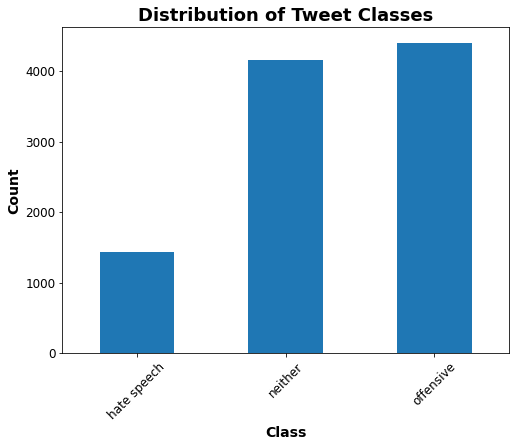

In [241]:
plt.figure(figsize=(8,6))
df.groupby('class').tweet.count().plot.bar(ylim=0)
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Tweet Classes', fontsize=18, fontweight='bold')
plt.show()

# SCRUB

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer 
from nltk import regexp_tokenize
import string
import re

In [18]:
## Define various parts of stop lists to use for cleaning tokenized tweets
# List of misspellings and shorthands that are equivalent to nltk's english stopwords
twitter_stops = ['bc', "i'm", 'im', "i'll", "i've" "it'll", 'hav',
                 "that's", 'dat', 'dats', 'u', 'da', 'n', "there's",
                 "he's", 'hes', "we'll", "we've", 'cus']

# Punctuation tokens to remove in addition to string.punctuation
more_punc = ['...', '“','”',"''",'’','``','. .', '..']

# List of numbers to remove
num = [0,1,2,3,4,5,6,7,8,9]

# Full list of all stop tokens (words and punctuation)
stopwords_list = stopwords.words('english') + list(string.punctuation) + twitter_stops + more_punc + num

# List of punctuation stop tokens
stoppunct_list = list(string.punctuation) + more_punc

In [19]:
"had" in stopwords.words('english')

True

In [20]:
"i" in stopwords_list

True

In [242]:
## Create new cols in df for tweets cleaned (and tokenized) to differing degrees
# Text cleaned of mentions, url's, etc.
df['text'] = df['tweet'].apply(lambda x: clean_tweet(x))
# Punctuation removed
df['tokens_clean'] = df['tweet'].apply(lambda x: tokenize_tweet(x, stoppunct_list))
# Stop words and punctuation removed
df['tokens_stopped'] = df['tweet'].apply(lambda x: tokenize_tweet(x, stopwords_list))
# Cleaned text lemmatized
df['lemma_text'] = df['tokens_stopped'].apply(lambda x: lemma_text(x))
# Lemmatized tokens
df['lemma_tokens'] = df['lemma_text'].apply(lambda x: tokenize_tweet(x, stopwords_list))
# Preview updated df
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_code,text,tokens_clean,tokens_stopped,lemma_text,lemma_tokens
0,3,2,1,0,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0,""" : queer"" gaywad","[queer, gaywad]","[queer, gaywad]",queer gaywad,"[queer, gaywad]"
1,3,3,0,0,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0,""" : alsarabsss"" hes a beaner smh you can tel...","[alsarabsss, hes, a, beaner, smh, you, can, te...","[alsarabsss, beaner, smh, tell, mexican]",alsarabsss beaner smh tell mexican,"[alsarabsss, beaner, smh, tell, mexican]"
2,3,3,0,0,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0,""" : you're fucking gay, blacklisted hoe"" Hol...","[you're, fucking, gay, blacklisted, hoe, holdi...","[fucking, gay, blacklisted, hoe, holding, tehg...",fucking gay blacklisted hoe holding tehgodclan...,"[fucking, gay, blacklisted, hoe, holding, tehg..."
3,3,3,0,0,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0,""" : LMFAOOOO I HATE BLACK PEOPLE This is why...","[lmfaoooo, i, hate, black, people, this, is, w...","[lmfaoooo, hate, black, people, black, people,...",lmfaoooo hate black people black people nigger,"[lmfaoooo, hate, black, people, black, people,..."
4,3,2,1,0,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0,""" : ""At least I'm not a nigger"" \n\nLmfao","[at, least, i'm, not, a, nigger, lmfao]","[least, nigger, lmfao]",least nigger lmfao,"[least, nigger, lmfao]"


# EXPLORE

In [25]:
from nltk import FreqDist
from wordcloud import WordCloud

In [26]:
## Create a variable "raw_corpus" containing all text
raw_corpus = df['text'].to_list()
raw_corpus[:20]

['" :     queer" gaywad',
 '" :   alsarabsss" hes a beaner smh you can tell hes a mexican',
 '" :   you\'re fucking gay, blacklisted hoe" Holding out for  TehGodClan anyway  ',
 '" : LMFAOOOO I HATE BLACK PEOPLE   This is why there\'s black people and niggers',
 '" : "At least I\'m not a nigger"  \n\nLmfao',
 '" :   Ariza is a snake and a coward" but at least he isn\'t a cripple like your hero Roach lmaoo',
 '" : Drakes new shoes that will be released by Nike/Jordan.... Yes, there\'s glitter on the shoes   ....dudes a fag',
 '" :  GerrysHalloweenParty   Halloween was yesterday stupid nigger',
 '" :   is bored supposed to be cute, you faggot?" Sometimes',
 '" :   lassen cc , the coach wants me" i feel it youll get more my nig no doubt',
 '" : Jackies a retard  blondeproblems" At least I can make a grilled cheese!',
 '" : Stacey Dash won  ;   baddest bitch evaaaa',
 '"Don\'t worry about the nigga you see, worry about the nigga you DON\'T see... Dat\'s da nigga fuckin yo bitch."',
 '"Hey 

In [27]:
clean_tokens = get_token_list(df, 'tokens_clean', freq=True)


********** tokens_clean Summary **********

Number of unique words = 14200


,token,count
0,a,3717
1,the,3380
2,i,2867
3,to,2277
4,you,2173
5,and,2166
6,bitch,2064
7,in,1416
8,is,1349
9,that,1313


In [28]:
stopped_tokens = get_token_list(df, 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 14021


,token,count
0,bitch,2064
1,like,981
2,trash,897
3,bitches,764
4,hoes,584
5,pussy,564
6,hoe,518
7,get,487
8,ass,458
9,fuck,413


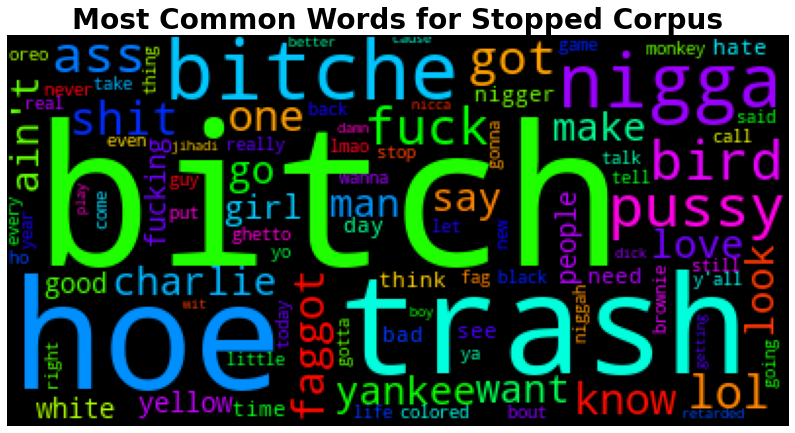

In [29]:
plot_wordcloud(stopped_tokens, 'Stopped Corpus');

In [30]:
hate_tokens = get_token_list(df.groupby('class').get_group('hate speech'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 3487


,token,count
0,bitch,209
1,faggot,190
2,like,167
3,nigga,139
4,ass,138
5,white,127
6,fuck,121
7,trash,113
8,nigger,112
9,fucking,94


In [31]:
offensive_tokens = get_token_list(df.groupby('class').get_group('offensive'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 6685


,token,count
0,bitch,1844
1,bitches,705
2,hoes,518
3,like,512
4,pussy,508
5,hoe,440
6,ass,317
7,fuck,292
8,shit,283
9,get,271


In [32]:
neither_tokens = get_token_list(df.groupby('class').get_group('neither'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 9652


,token,count
0,trash,689
1,bird,303
2,like,302
3,charlie,260
4,yankees,225
5,yellow,218
6,birds,169
7,lol,147
8,get,147
9,one,130


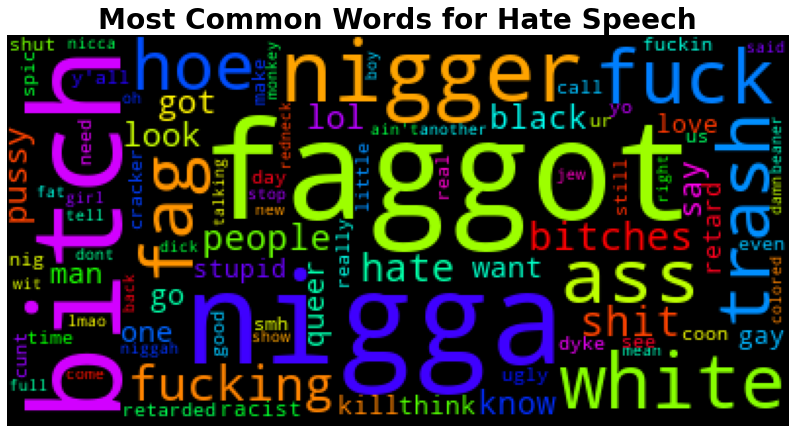

In [33]:
plot_wordcloud(hate_tokens, 'Hate Speech');

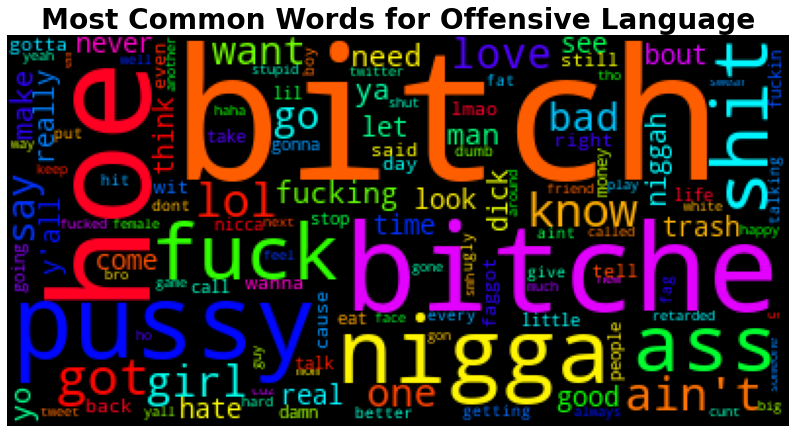

In [34]:
plot_wordcloud(offensive_tokens, 'Offensive Language');

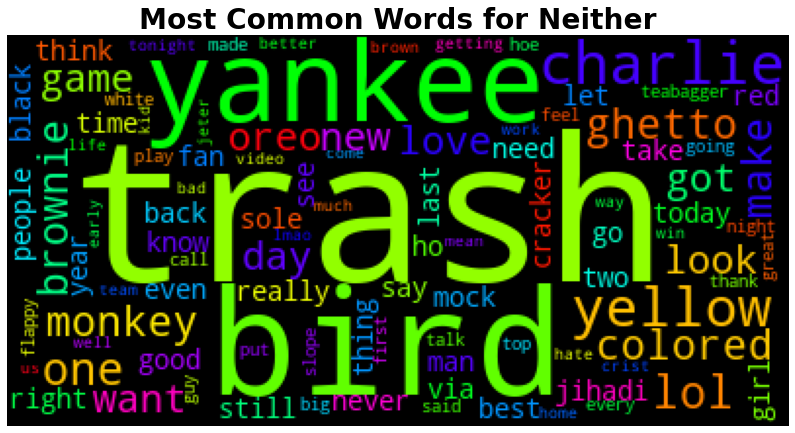

In [35]:
plot_wordcloud(neither_tokens, 'Neither');

In [36]:
## Create bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

## Make a DataFrame from the bigrams
pd.DataFrame(tweets_scored, columns=['Word', 'Freq']).head(25)

,Word,Freq
0,"(look, like)",0.001046
1,"(white, trash)",0.000980
2,"(bitch, ass)",0.000913
3,"(like, bitch)",0.000715
4,"(ass, nigga)",0.000702
5,"(ass, bitch)",0.000688
6,"(bad, bitch)",0.000649
7,"(fuck, bitch)",0.000635
8,"(flappy, bird)",0.000556
9,"(little, bitch)",0.000530


In [37]:
## Calculate Pointwise Mutual Information scores
tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(5)
tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)

# Make a DataFrame from the Bigrams with PMI
pd.DataFrame.from_records(tweet_pmi_scored, columns=['Words', 'PMI']).head(25)

,Words,PMI
0,"(spear, chucker)",13.619972
1,"(disrupts, shylock)",13.397579
2,"(operation, disrupts)",13.397579
3,"(shylock, banking)",13.397579
4,"(scally, lad)",12.549582
5,"(blah, blah)",12.368433
6,"(rated, spa)",11.957007
7,"(grand, opening)",11.812617
8,"(guinea, pig)",11.812617
9,"(catches, worm)",11.771975


# MODEL

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn import metrics

In [39]:
## Make X and y
y = df['class_code'].copy()
X = df['text'].copy()
X_lemma = df['lemma_text'].copy()

In [40]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=319)
# setting stratify=y should ensure class imbalances remain similar to original distribution

In [41]:
## Check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 1    0.4407
2    0.4163
0    0.1430
Name: class_code, dtype: float64 
------

**y_train**
 1    0.44075
2    0.41625
0    0.14300
Name: class_code, dtype: float64 
------

**y_test**
 1    0.4405
2    0.4165
0    0.1430
Name: class_code, dtype: float64 
------



In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000,) (2000,) (8000,) (2000,)


In [43]:
## Train Test Split
X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(X_lemma,
                                                                            y,
                                                                            test_size=0.2,
                                                                            stratify=y,
                                                                            random_state=319)
# setting stratify=y should ensure class imbalances remain similar to original distribution

In [44]:
X_train

7332    Damn those shiner rock those bud light platinu...
9652    Video: Charlie Baker makes final push for votes  
1746                                               bitch.
6696      hey I'll leave Abbey too! Oh if I get a job ...
7487              Gone bust it open for a real nicca  ; ;
                              ...                        
586                                      stfu u ugly dyke
64                ; : "fucking white people"   bitch wut?
9729    Whoever made these brownies and cookies belong...
9964    they're not playing Charlie Strong's soft don'...
4312                   You pussy nigga, I see ya whiskers
Name: text, Length: 8000, dtype: object

In [45]:
X_lemma_train

7332            damn shiner rock bud light platinum ciroc
9652             video charlie baker make final push vote
1746                                                bitch
6696    hey leave abbey oh get job slope might move ba...
7487                            gone bust open real nicca
                              ...                        
586                                        stfu ugly dyke
64                         fucking white people bitch wut
9729            whoever made brownie cooky belongs heaven
9964    they're playing charlie strong's soft run scor...
4312                           pussy nigga see ya whisker
Name: lemma_text, Length: 8000, dtype: object

## Baseline Models

In [46]:
## Initialize tokenizer to use for base model
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

## Initialize vectorizers to use for base models
count_vec = CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)

tfidf_vec = TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)

## Vectorize X_train and X_test with each vectorizer
X_train_count_vec = count_vec.fit_transform(X_train)
X_test_count_vec = count_vec.transform(X_test)

X_train_tfidf_vec = tfidf_vec.fit_transform(X_train)
X_test_tfidf_vec = tfidf_vec.transform(X_test)

print(X_train_count_vec.shape, X_test_count_vec.shape)
print(X_train_tfidf_vec.shape, X_test_tfidf_vec.shape)

(8000, 12432) (2000, 12432)
(8000, 12432) (2000, 12432)


### Baseline Random Forest Classifiers

In [47]:
## Build baseline Random Forest Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
rf_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('rf', RandomForestClassifier(random_state=319))
                        ])

rf_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('rf', RandomForestClassifier(random_state=319))
                        ])

---------------------------------------------------------
Classification Report: Baseline RF with Count Vectorizer
---------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.69      0.53      0.60       286
   Offensive       0.85      0.90      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.86      0.86      0.86      2000

---------------------------------------------------------
---------------------------------------------------------




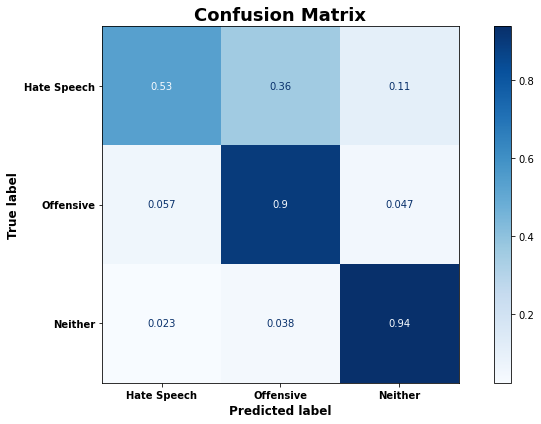

In [48]:
## Fit and evaluate baseline RF with Count Vectorizer
rf_cv_pipe.fit(X_train, y_train)
eval_classifier(rf_cv_pipe, X_test, y_test, model_descr='Baseline RF with Count Vectorizer');

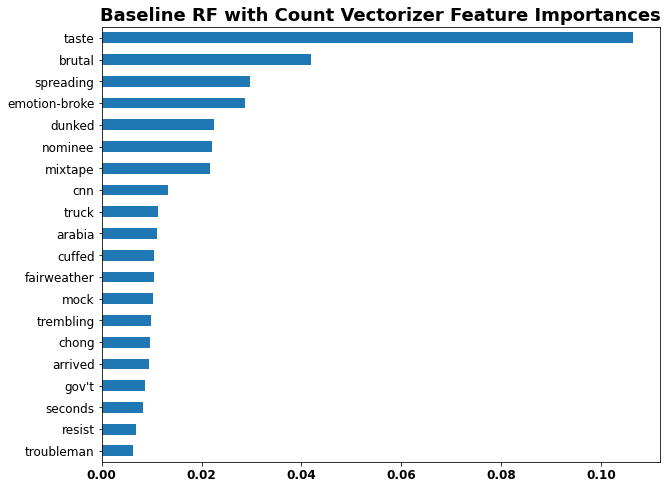

In [49]:
plot_feat_importance(rf_cv_pipe, 'rf', 'count_vec', 'Baseline RF with Count Vectorizer');

----------------------------------------------------------
Classification Report: Baseline RF with TF-IDF Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.77      0.49      0.60       286
   Offensive       0.85      0.91      0.88       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.87      2000
   macro avg       0.84      0.78      0.80      2000
weighted avg       0.86      0.87      0.86      2000

----------------------------------------------------------
----------------------------------------------------------




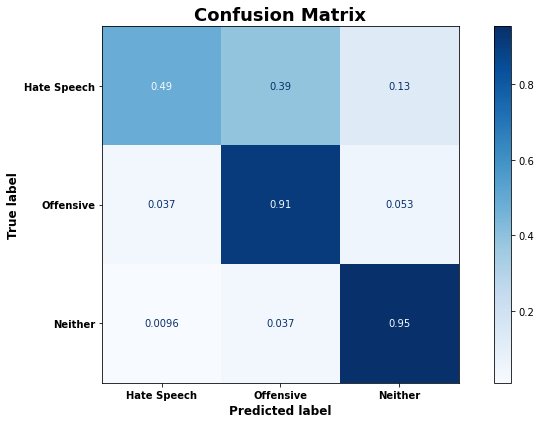

In [50]:
## Fit and evaluate baseline RF with TF-IDF Vectorizer
rf_tfidf_pipe.fit(X_train, y_train)
eval_classifier(rf_tfidf_pipe, X_test, y_test, model_descr='Baseline RF with TF-IDF Vectorizer');

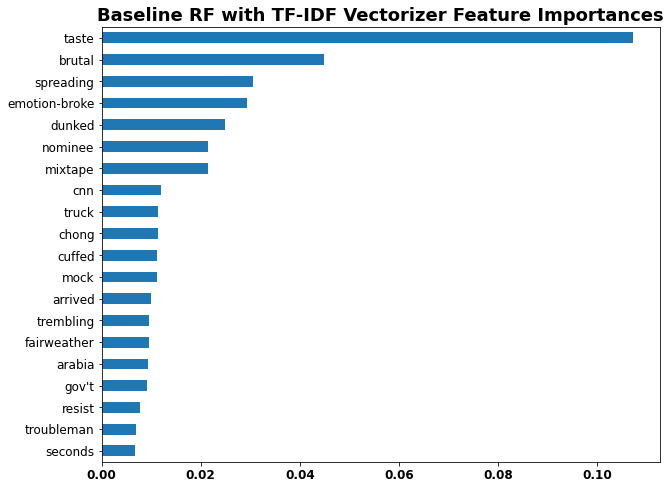

In [51]:
plot_feat_importance(rf_tfidf_pipe, 'rf', 'tfidf_vec', 'Baseline RF with TF-IDF Vectorizer');

### Baseline Multinomial Naive Bayes Classifiers

In [52]:
# Build baseline Multinomial Naive Bayes Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
mnb_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('mnb', MultinomialNB())
                        ])

mnb_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('mnb', MultinomialNB())
                        ])

----------------------------------------------------------
Classification Report: Baseline MNB with Count Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.73      0.31      0.44       286
   Offensive       0.78      0.95      0.85       881
     Neither       0.91      0.88      0.89       833

    accuracy                           0.83      2000
   macro avg       0.81      0.71      0.73      2000
weighted avg       0.83      0.83      0.81      2000

----------------------------------------------------------
----------------------------------------------------------




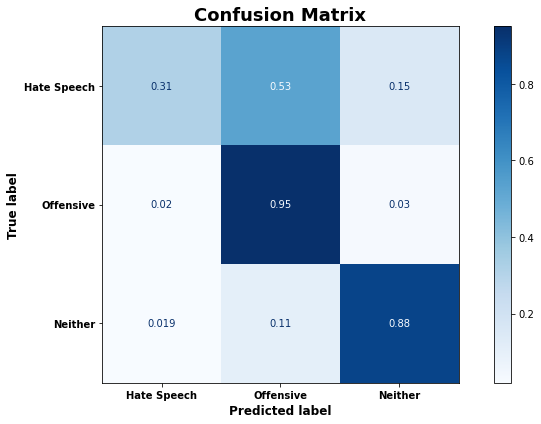

In [53]:
## Fit and evaluate baseline MNB with Count Vectorizer
mnb_cv_pipe.fit(X_train, y_train)
eval_classifier(mnb_cv_pipe, X_test, y_test, model_descr='Baseline MNB with Count Vectorizer');

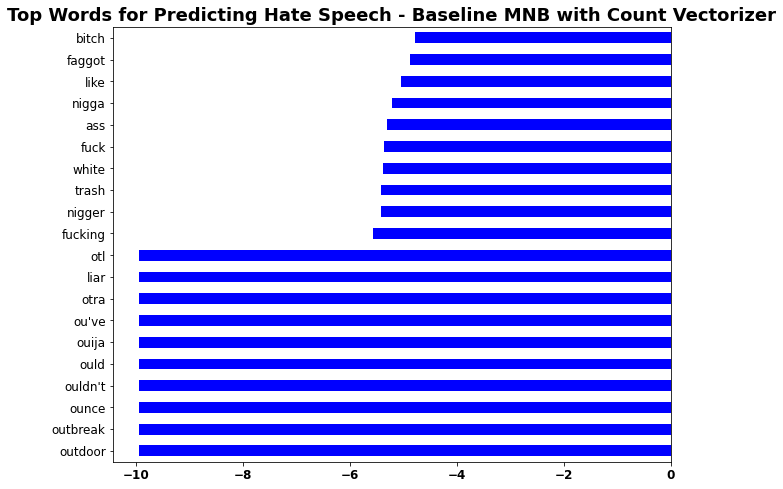

In [54]:
plot_coefficients(mnb_cv_pipe, 'mnb', 'count_vec', 0, 'Baseline MNB with Count Vectorizer');

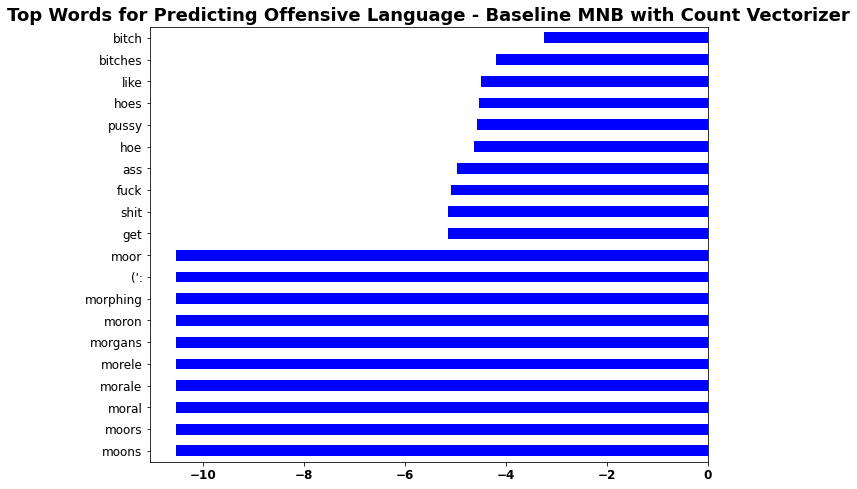

In [55]:
plot_coefficients(mnb_cv_pipe, 'mnb', 'count_vec', 1, 'Baseline MNB with Count Vectorizer');

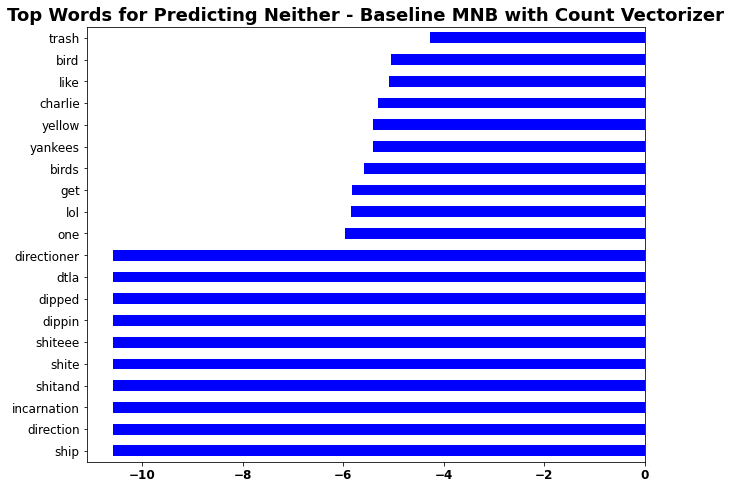

In [56]:
plot_coefficients(mnb_cv_pipe, 'mnb', 'count_vec', 2, 'Baseline MNB with Count Vectorizer');

-----------------------------------------------------------
Classification Report: Baseline MNB with TF-IDF Vectorizer
-----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.89      0.06      0.11       286
   Offensive       0.70      0.97      0.81       881
     Neither       0.90      0.83      0.86       833

    accuracy                           0.78      2000
   macro avg       0.83      0.62      0.59      2000
weighted avg       0.81      0.78      0.73      2000

-----------------------------------------------------------
-----------------------------------------------------------




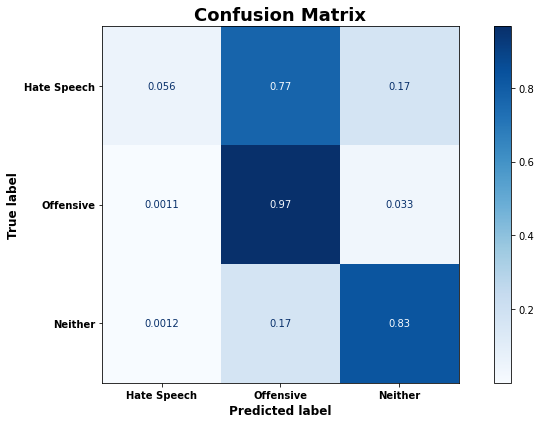

In [57]:
## Fit and evaluate baseline MNB with Count Vectorizer
mnb_tfidf_pipe.fit(X_train, y_train)
eval_classifier(mnb_tfidf_pipe, X_test, y_test, model_descr='Baseline MNB with TF-IDF Vectorizer');

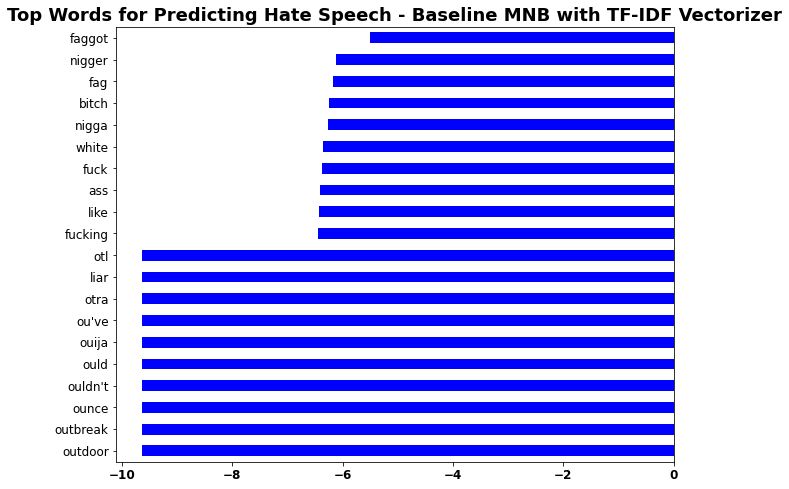

In [58]:
plot_coefficients(mnb_tfidf_pipe, 'mnb', 'tfidf_vec', 0, 'Baseline MNB with TF-IDF Vectorizer');

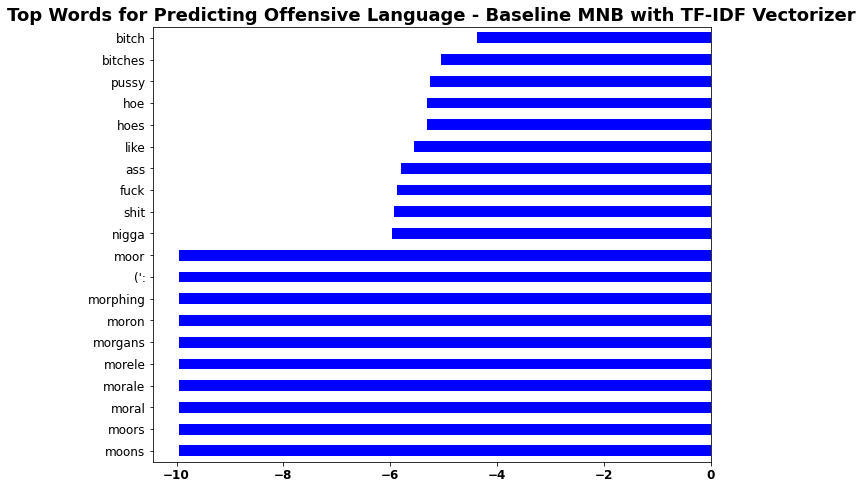

In [59]:
plot_coefficients(mnb_tfidf_pipe, 'mnb', 'tfidf_vec', 1, 'Baseline MNB with TF-IDF Vectorizer');

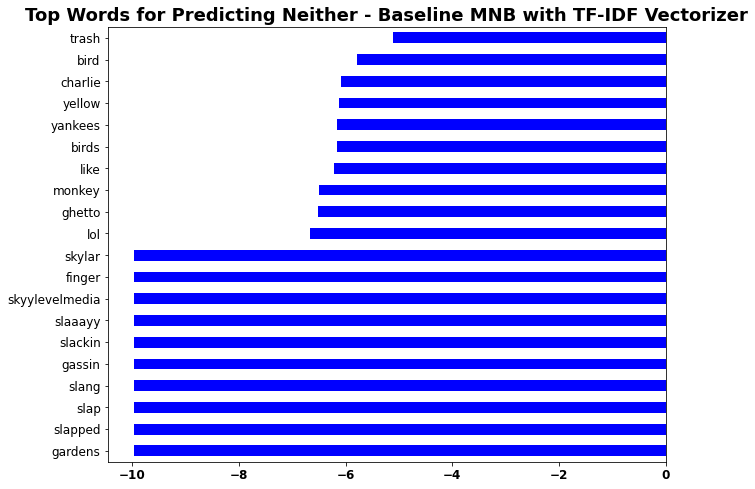

In [60]:
plot_coefficients(mnb_tfidf_pipe, 'mnb', 'tfidf_vec', 2, 'Baseline MNB with TF-IDF Vectorizer');

### Baseline LinearSVC Classifiers

In [61]:
# Build baseline LinearSVC Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
svc_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svc', LinearSVC(random_state=319))
                        ])

svc_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svc', LinearSVC(random_state=319))
                        ])

----------------------------------------------------------------
Classification Report: Baseline LinearSVC with Count Vectorizer
----------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.60      0.57      0.59       286
   Offensive       0.84      0.87      0.85       881
     Neither       0.92      0.91      0.91       833

    accuracy                           0.84      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.84      0.84      0.84      2000

----------------------------------------------------------------
----------------------------------------------------------------




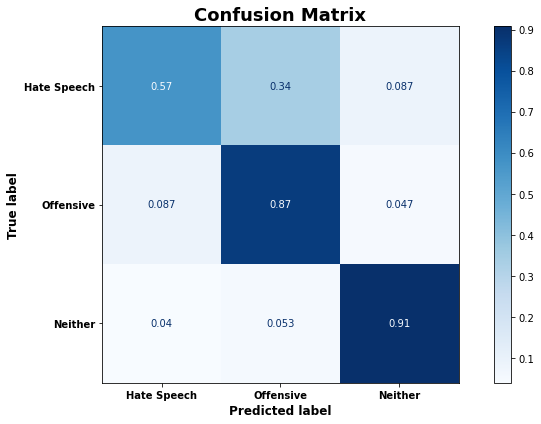

In [62]:
## Fit and evaluate baseline LinearSVC with Count Vectorizer
svc_cv_pipe.fit(X_train, y_train)
eval_classifier(svc_cv_pipe, X_test, y_test, model_descr='Baseline LinearSVC with Count Vectorizer');

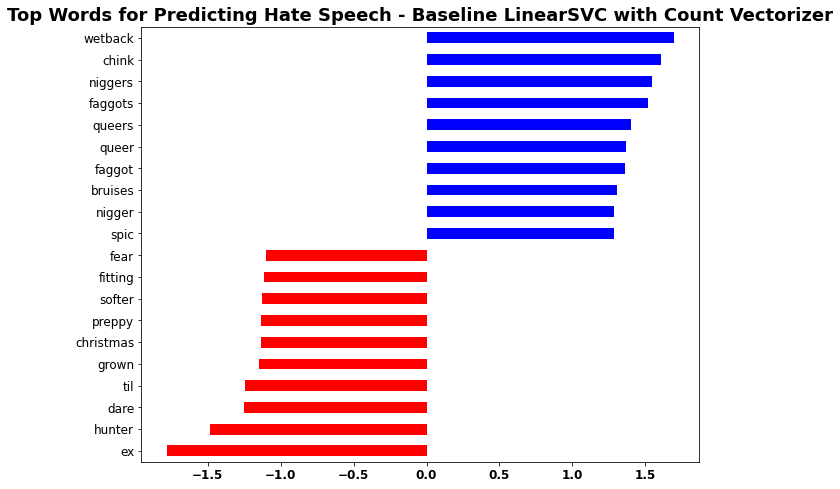

In [63]:
plot_coefficients(svc_cv_pipe, 'svc', 'count_vec', 0, 'Baseline LinearSVC with Count Vectorizer');

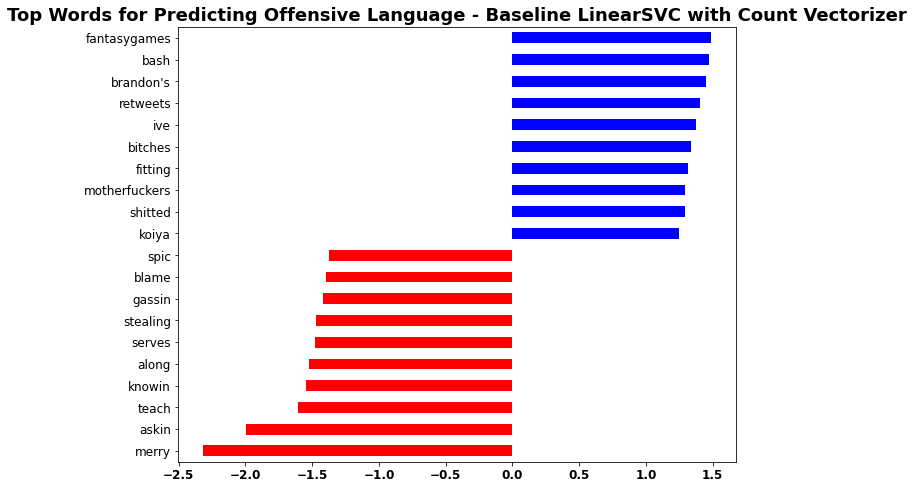

In [64]:
plot_coefficients(svc_cv_pipe, 'svc', 'count_vec', 1, 'Baseline LinearSVC with Count Vectorizer');

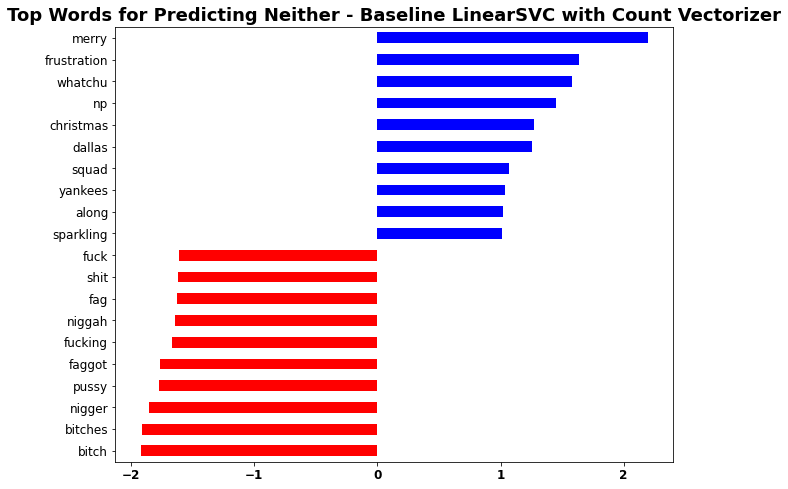

In [65]:
plot_coefficients(svc_cv_pipe, 'svc', 'count_vec', 2, 'Baseline LinearSVC with Count Vectorizer');

-----------------------------------------------------------------
Classification Report: Baseline LinearSVC with TF-IDF Vectorizer
-----------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.70      0.55      0.61       286
   Offensive       0.86      0.89      0.87       881
     Neither       0.90      0.94      0.92       833

    accuracy                           0.86      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.85      0.86      0.85      2000

-----------------------------------------------------------------
-----------------------------------------------------------------




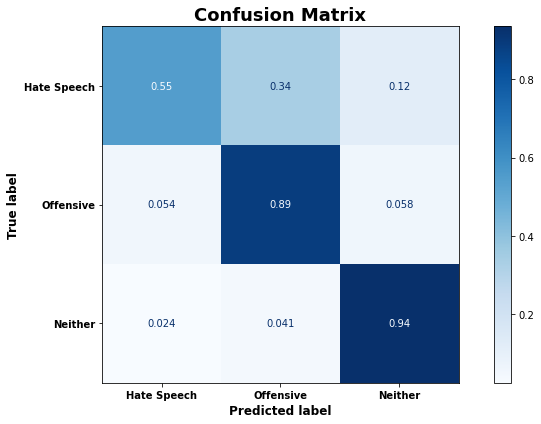

In [66]:
## Fit and evaluate baseline LinearSVC with Count Vectorizer
svc_tfidf_pipe.fit(X_train, y_train)
eval_classifier(svc_tfidf_pipe, X_test, y_test, model_descr='Baseline LinearSVC with TF-IDF Vectorizer');

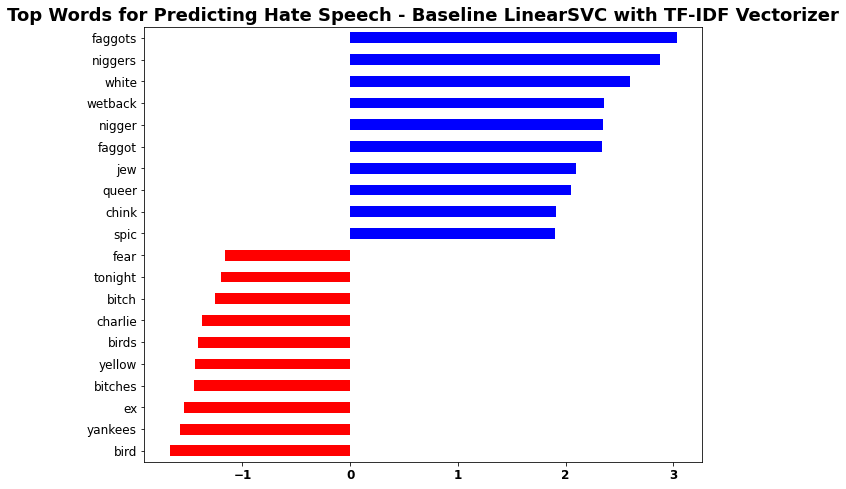

In [67]:
plot_coefficients(svc_tfidf_pipe, 'svc', 'tfidf_vec', 0, 'Baseline LinearSVC with TF-IDF Vectorizer');

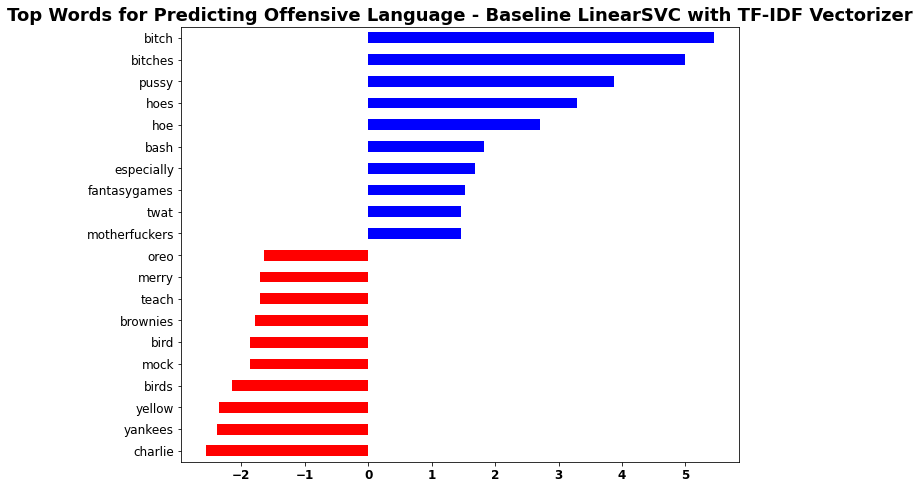

In [68]:
plot_coefficients(svc_tfidf_pipe, 'svc', 'tfidf_vec', 1, 'Baseline LinearSVC with TF-IDF Vectorizer');

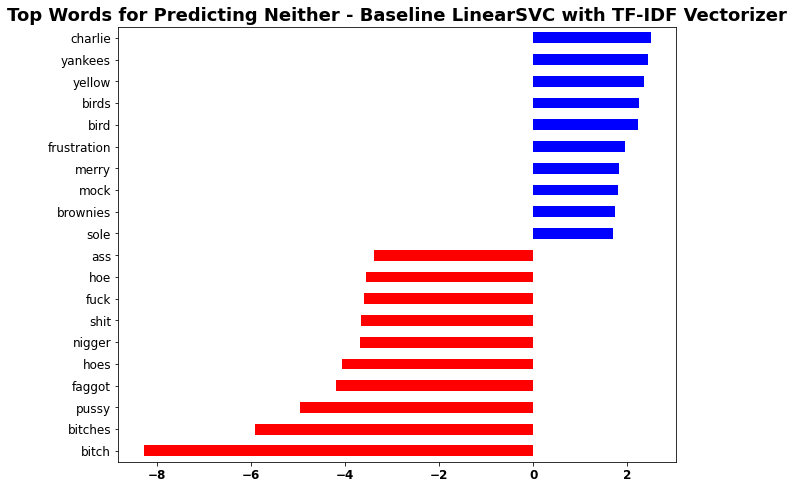

In [69]:
plot_coefficients(svc_tfidf_pipe, 'svc', 'tfidf_vec', 2, 'Baseline LinearSVC with TF-IDF Vectorizer');

### Baseline XGB Classifiers

In [70]:
## Build baseline XGBoost Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
xgb_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svd', TruncatedSVD(n_components=150, random_state=319)),
                         ('xgb', XGBClassifier(random_state=319, n_jobs=-1))
                        ])

xgb_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svd', TruncatedSVD(n_components=150, random_state=319)),
                         ('xgb', XGBClassifier(random_state=319, n_jobs=-1))
                        ])

----------------------------------------------------------
Classification Report: Baseline XGB with Count Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.73      0.36      0.48       286
   Offensive       0.87      0.86      0.87       881
     Neither       0.82      0.97      0.89       833

    accuracy                           0.83      2000
   macro avg       0.81      0.73      0.75      2000
weighted avg       0.83      0.83      0.82      2000

----------------------------------------------------------
----------------------------------------------------------




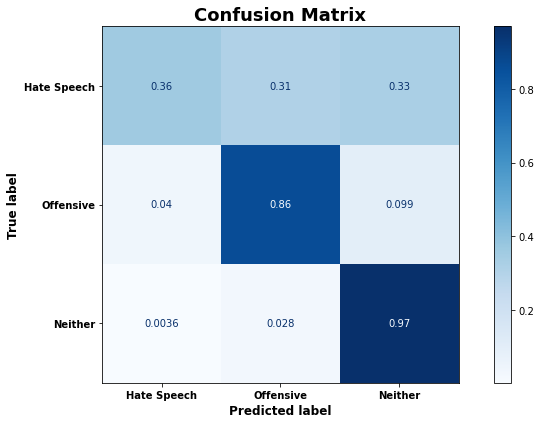

In [71]:
## Fit and evaluate baseline XGB with Count Vectorizer
xgb_cv_pipe.fit(X_train, y_train)
eval_classifier(xgb_cv_pipe, X_test, y_test, model_descr='Baseline XGB with Count Vectorizer');

In [72]:
#plot_feat_importance(xgb_cv_pipe, 'xgb', 'count_vec', 'Baseline XGB with Count Vectorizer');

-----------------------------------------------------------
Classification Report: Baseline XGB with TF-IDF Vectorizer
-----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.71      0.42      0.53       286
   Offensive       0.87      0.88      0.87       881
     Neither       0.85      0.96      0.90       833

    accuracy                           0.84      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.84      0.84      0.83      2000

-----------------------------------------------------------
-----------------------------------------------------------




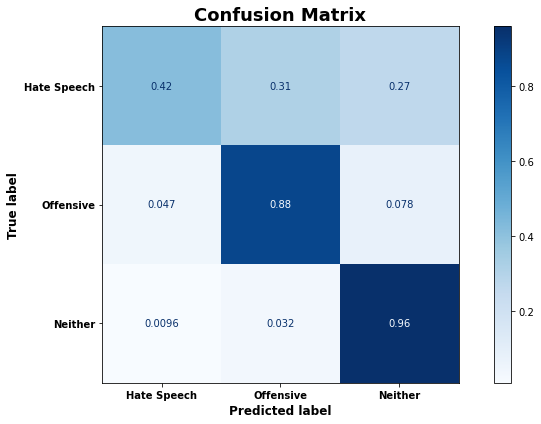

In [73]:
## Fit and evaluate baseline XGB with TF-IDF Vectorizer
xgb_tfidf_pipe.fit(X_train, y_train)
eval_classifier(xgb_tfidf_pipe, X_test, y_test, model_descr='Baseline XGB with TF-IDF Vectorizer');

## Hyperparameter Tuning for Random Forest Classifiers

### Tuning Count Vectorizer Random Forests

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:55:27 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:56:15 AM

***** Total Training Time: 0:00:48.225117


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 2), 'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None}


-------------------------------------------------------------------
Classification Report: Best Count Vectorizer RF Tuned for Accuracy
-------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.57      0.62       286
   Offensive       0.87      0.89      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.87      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.86      0.87      0.

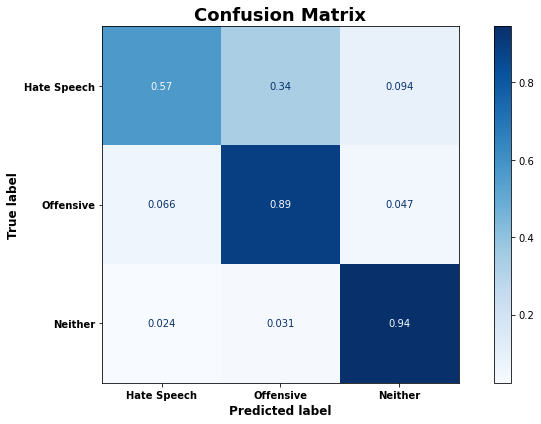

In [74]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_cv_acc_grid = fit_grid_clf(rf_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer RF Tuned for Accuracy',
                       score='accuracy')

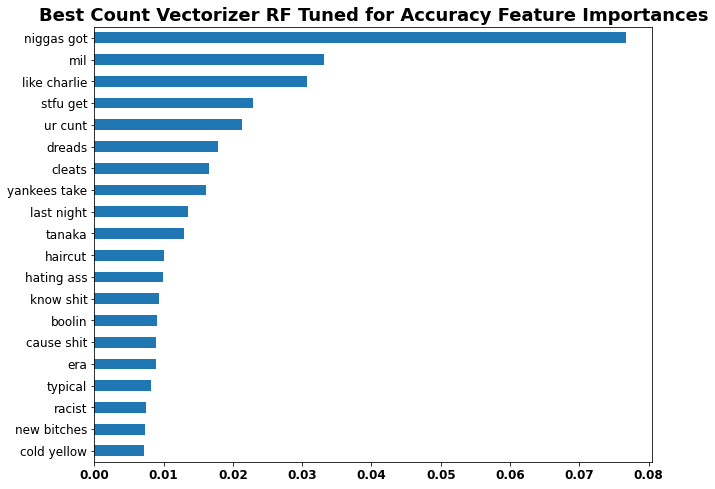

In [75]:
plot_feat_importance(rf_cv_acc_grid.best_estimator_, 'rf', 'count_vec',
                     'Best Count Vectorizer RF Tuned for Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:56:16 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:57:02 AM

***** Total Training Time: 0:00:45.571799


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 2), 'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None}


----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer RF Tuned for Balanced Accuracy
----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.57      0.62       286
   Offensive       0.87      0.89      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.87      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg  

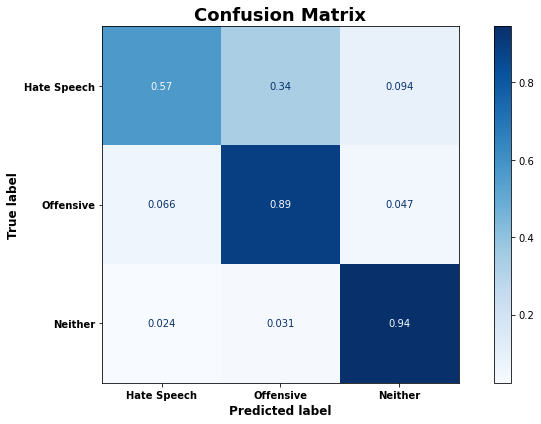

In [76]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_cv_bacc_grid = fit_grid_clf(rf_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer RF Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

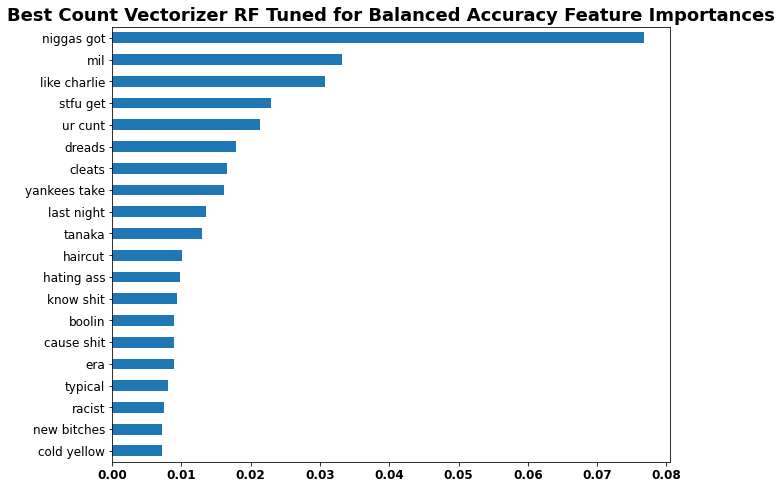

In [77]:
plot_feat_importance(rf_cv_bacc_grid.best_estimator_, 'rf', 'count_vec',
                     'Best Count Vectorizer RF Tuned for Balanced Accuracy');

### Tuning TF-IDF Vectorizer Random Forests

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:57:03 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:57:47 AM

***** Total Training Time: 0:00:43.820185


Best Parameters:
{'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': None, 'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2)}


---------------------------------------------------------
Classification Report: Best TF-IDF RF Tuned for Accuracy
---------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.76      0.49      0.60       286
   Offensive       0.86      0.91      0.88       881
     Neither       0.90      0.96      0.93       833

    accuracy                           0.87      2000
   macro avg       0.84      0.79      0.80      2000
weighted avg       0.86      0.87      0.86      2000

-------------

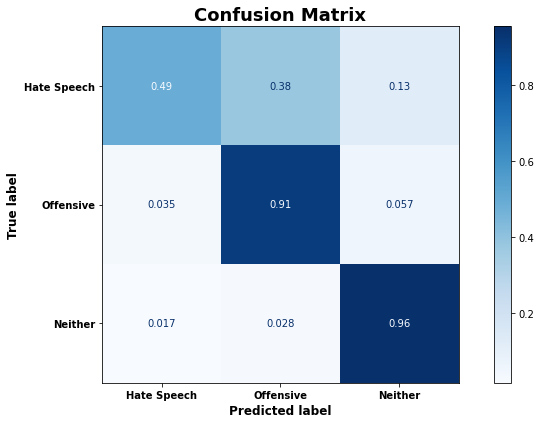

In [78]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_tfidf_acc_grid = fit_grid_clf(rf_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF RF Tuned for Accuracy',
                       score='accuracy')

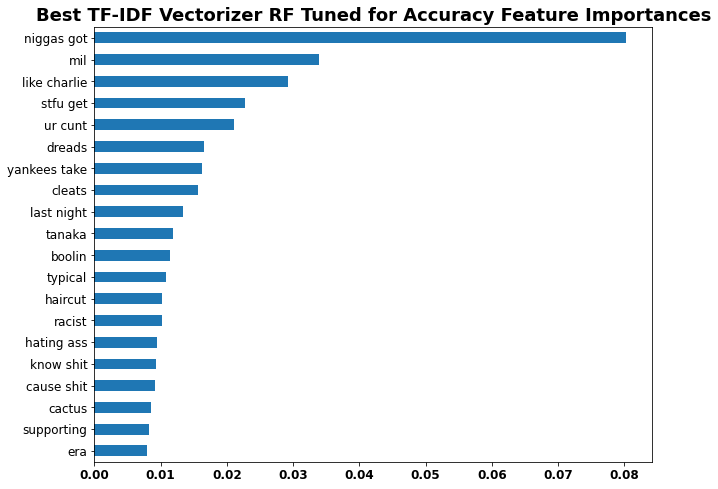

In [79]:
plot_feat_importance(rf_tfidf_acc_grid.best_estimator_, 'rf', 'tfidf_vec',
                     'Best TF-IDF Vectorizer RF Tuned for Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:57:48 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:58:31 AM

***** Total Training Time: 0:00:43.393381


Best Parameters:
{'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None, 'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2)}


------------------------------------------------------------------
Classification Report: Best TF-IDF RF Tuned for Balanced Accuracy
------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.73      0.50      0.60       286
   Offensive       0.86      0.90      0.88       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.87      2000
   macro avg       0.83      0.79      0.80      2000
weighted avg       0.86      0.87      0.86 

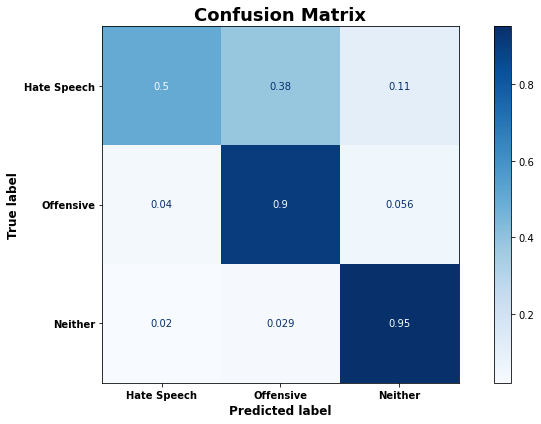

In [80]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_tfidf_bacc_grid = fit_grid_clf(rf_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF RF Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

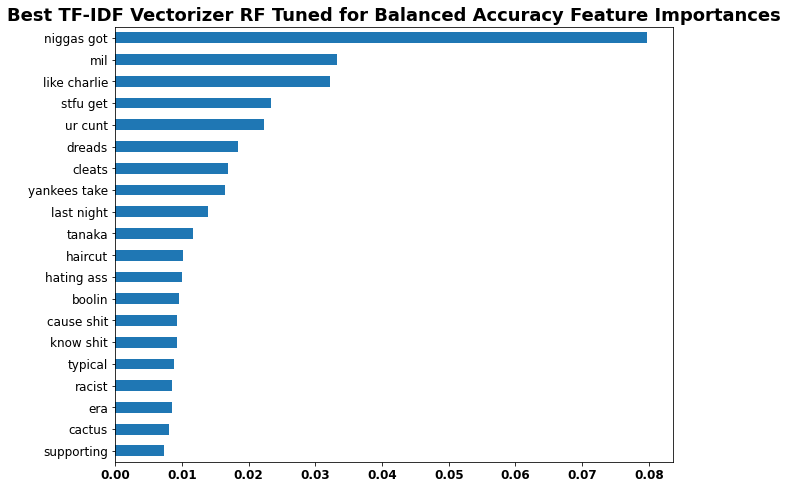

In [81]:
plot_feat_importance(rf_tfidf_bacc_grid.best_estimator_, 'rf', 'tfidf_vec',
                     'Best TF-IDF Vectorizer RF Tuned for Balanced Accuracy');

## Hyperparameter Tuning for Multinomial Naive Bayes Classifiers

### Tuning Count Vectorizer MNB Models

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:58:32 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:58:45 AM

***** Total Training Time: 0:00:12.508034


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 3), 'mnb__alpha': 1.0}


--------------------------------------------------------------------
Classification Report: Best Count Vectorizer MNB Tuned for Accuracy
--------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.44      0.53       286
   Offensive       0.80      0.92      0.86       881
     Neither       0.92      0.89      0.91       833

    accuracy                           0.84      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.83      0.84      0.83      2000

--------------------------------------------

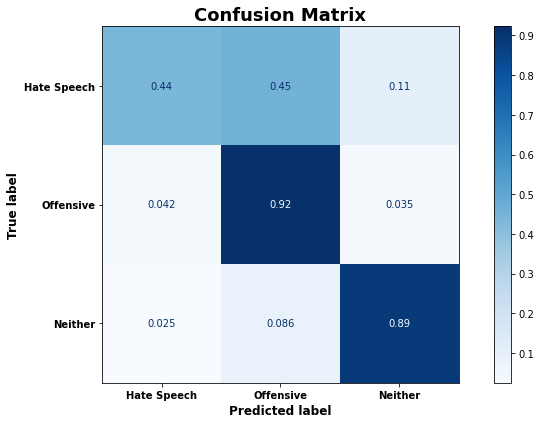

In [82]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_cv_acc_grid = fit_grid_clf(mnb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer MNB Tuned for Accuracy',
                       score='accuracy')

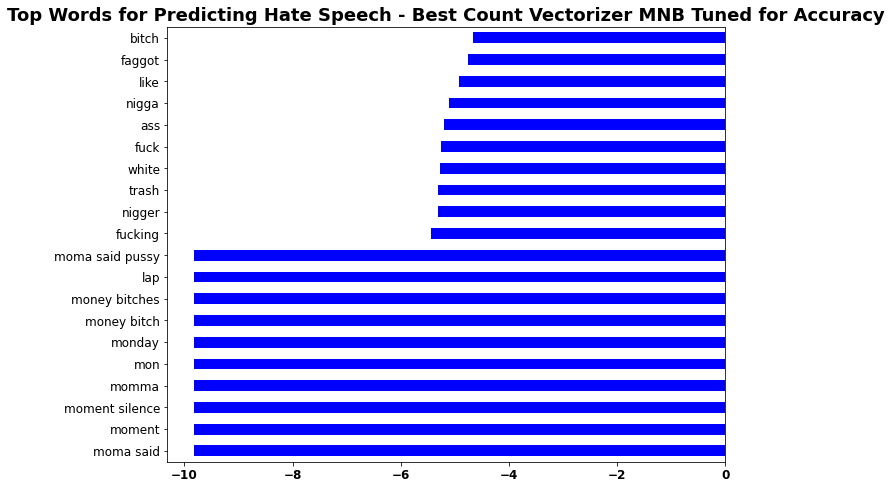

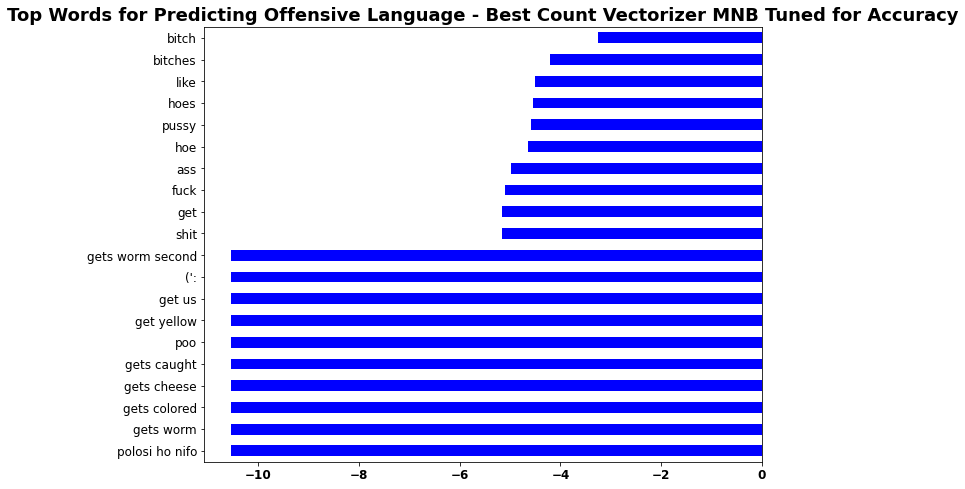

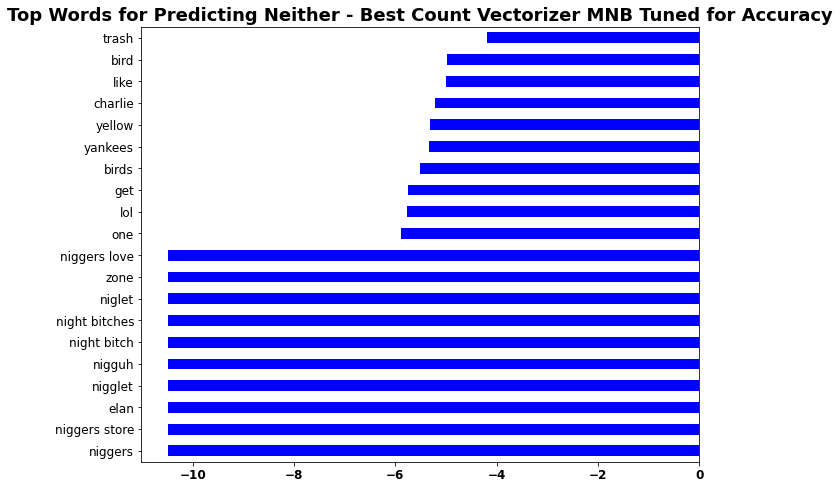

In [83]:
for i in range(0,3):
    plot_coefficients(mnb_cv_acc_grid.best_estimator_, 'mnb', 'count_vec', i,
                      'Best Count Vectorizer MNB Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:58:46 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:58:58 AM

***** Total Training Time: 0:00:12.563769


Best Parameters:
{'count_vec__min_df': 3, 'count_vec__ngram_range': (1, 3), 'mnb__alpha': 1.0}


-----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer MNB Tuned for Balanced Accuracy
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.64      0.47      0.54       286
   Offensive       0.80      0.91      0.85       881
     Neither       0.93      0.88      0.91       833

    accuracy                           0.84      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.83      0.84      0.83      2000

-----------------

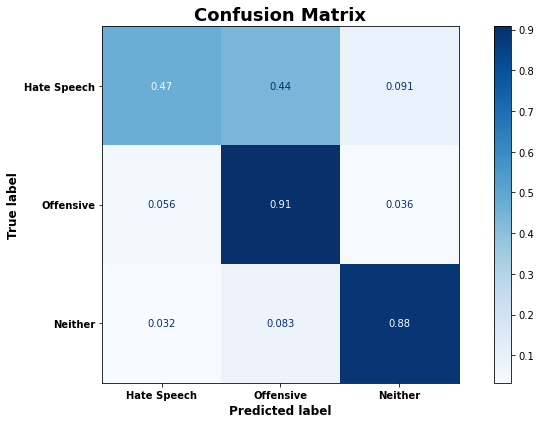

In [84]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_cv_bacc_grid = fit_grid_clf(mnb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer MNB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

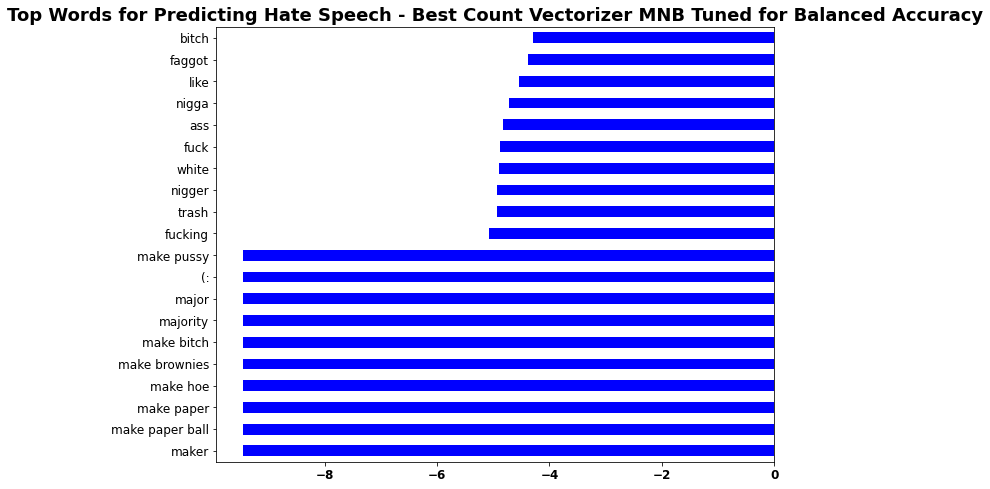

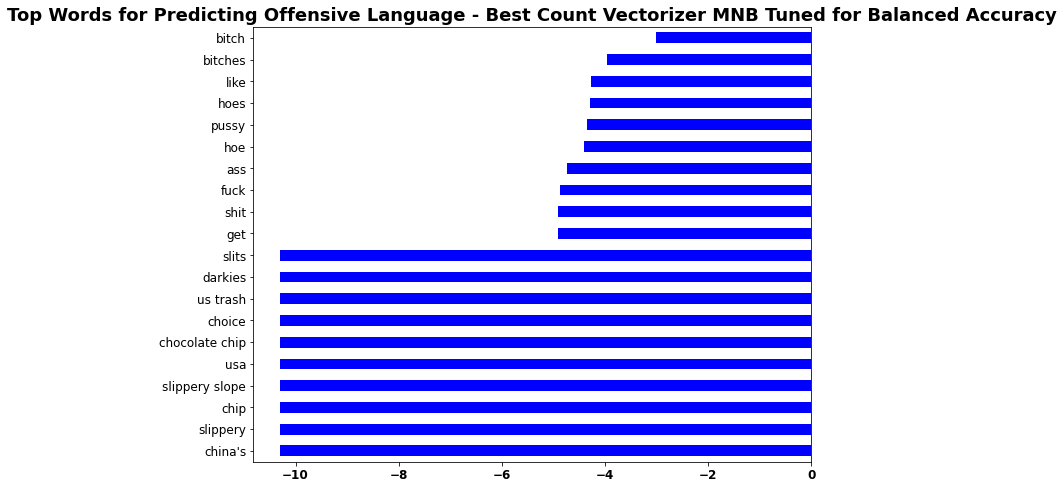

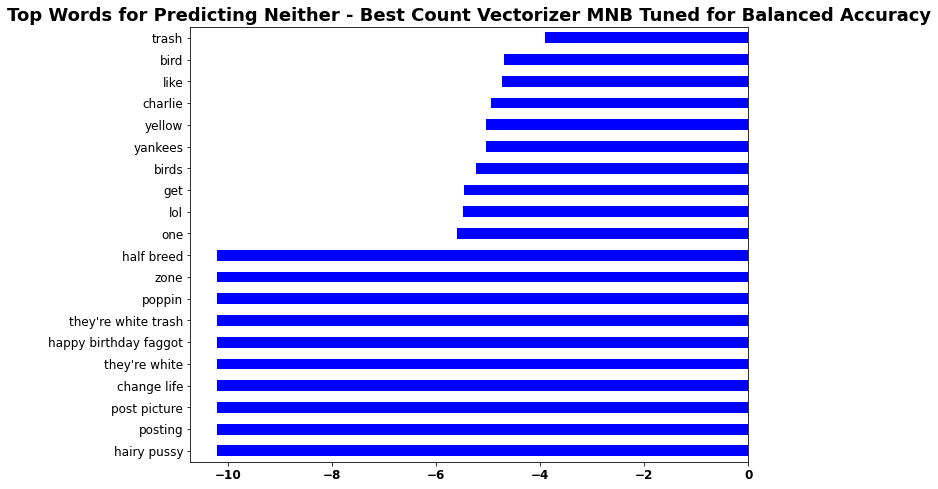

In [85]:
for i in range(0,3):
    plot_coefficients(mnb_cv_bacc_grid.best_estimator_, 'mnb', 'count_vec', i,
                      'Best Count Vectorizer MNB Tuned for Balanced Accuracy')

### Tuning TF-IDF MNB Models

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:59:00 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:59:12 AM

***** Total Training Time: 0:00:12.277358


Best Parameters:
{'mnb__alpha': 1.0, 'tfidf_vec__min_df': 3, 'tfidf_vec__ngram_range': (1, 2)}


---------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer MNB Tuned for Accuracy
---------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.83      0.21      0.33       286
   Offensive       0.75      0.95      0.84       881
     Neither       0.90      0.89      0.89       833

    accuracy                           0.82      2000
   macro avg       0.83      0.68      0.69      2000
weighted avg       0.83      0.82      0.79      2000

-----------------------------------------

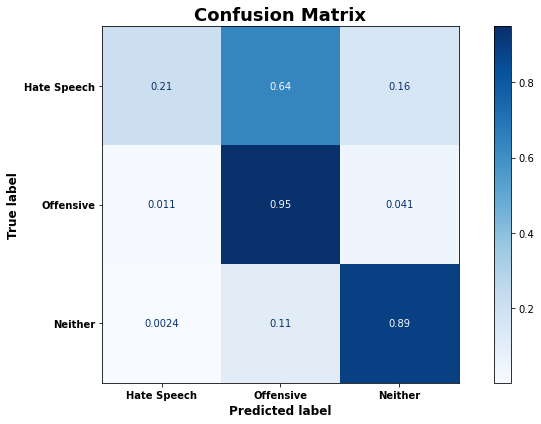

In [86]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_tfidf_acc_grid = fit_grid_clf(mnb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer MNB Tuned for Accuracy',
                       score='accuracy')

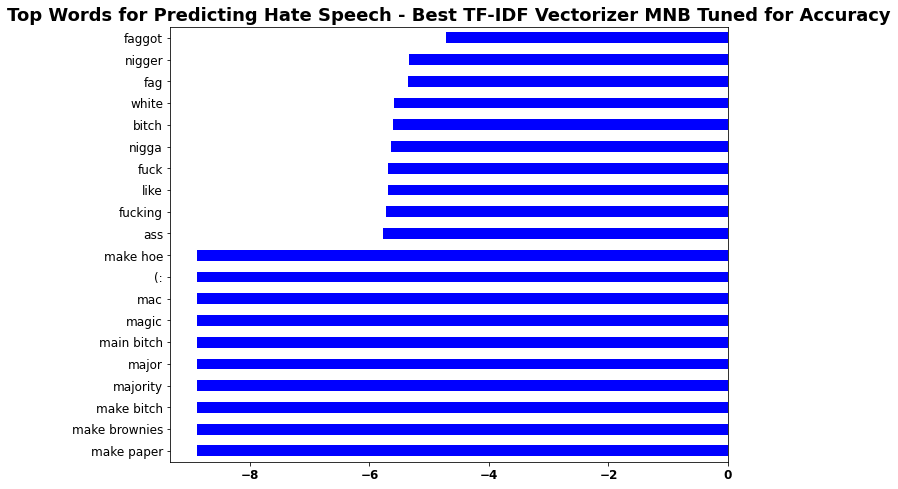

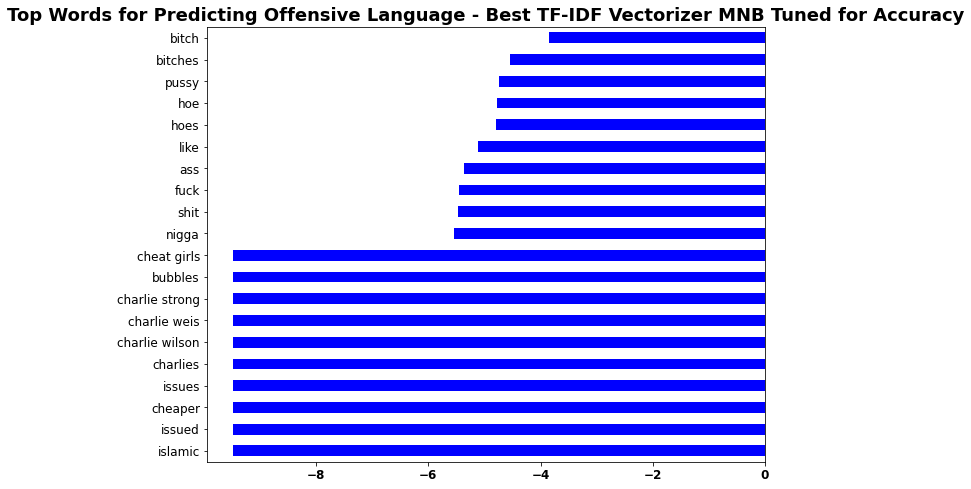

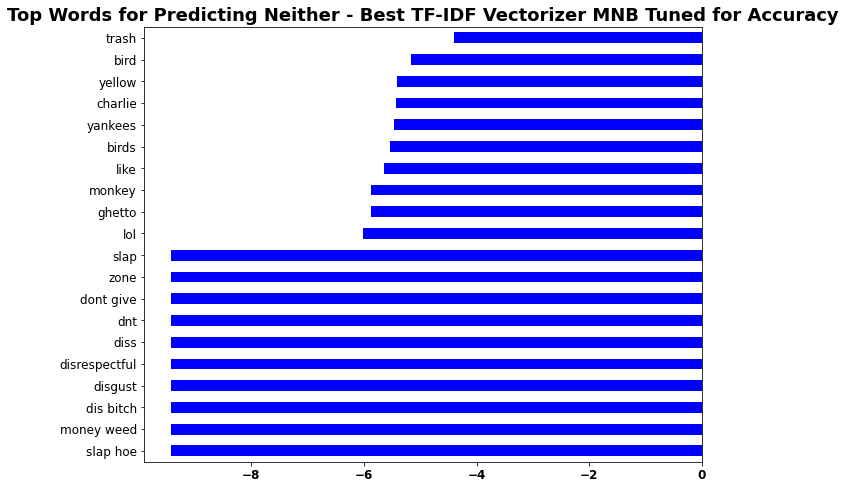

In [87]:
for i in range(0,3):
    plot_coefficients(mnb_tfidf_acc_grid.best_estimator_, 'mnb', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer MNB Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:59:13 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 07:59:26 AM

***** Total Training Time: 0:00:12.482849


Best Parameters:
{'mnb__alpha': 0.1, 'tfidf_vec__min_df': 3, 'tfidf_vec__ngram_range': (1, 2)}


------------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer MNB Tuned for Balanced Accuracy
------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.62      0.35      0.45       286
   Offensive       0.77      0.90      0.83       881
     Neither       0.89      0.87      0.88       833

    accuracy                           0.81      2000
   macro avg       0.76      0.71      0.72      2000
weighted avg       0.80      0.81      0.80      2000

--------------

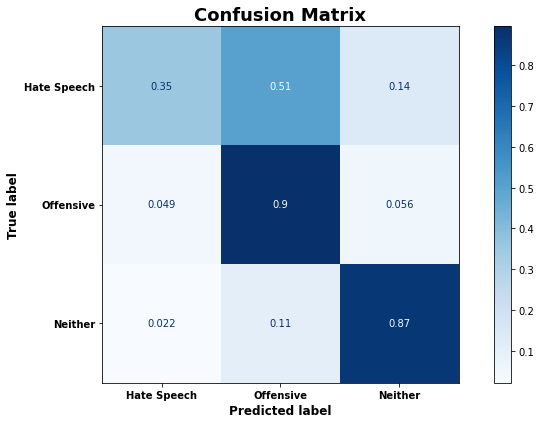

In [88]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_tfidf_bacc_grid = fit_grid_clf(mnb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer MNB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

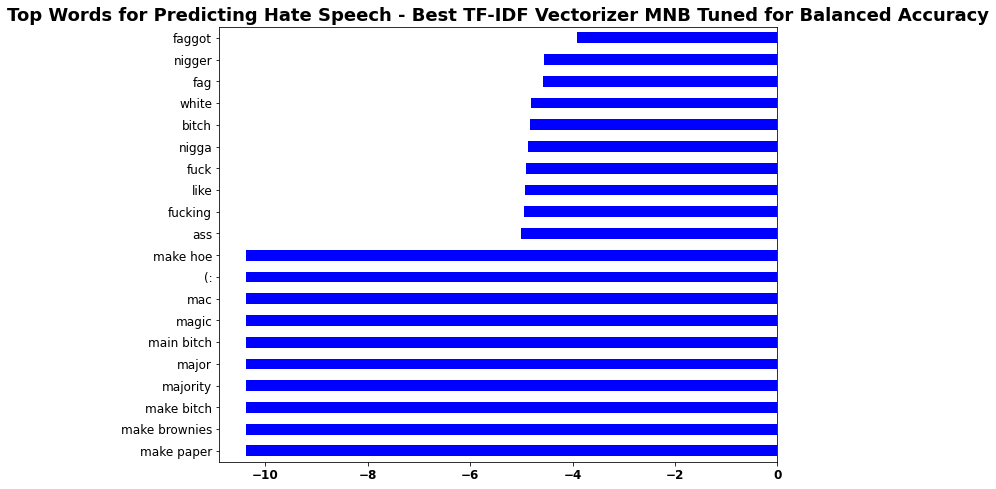

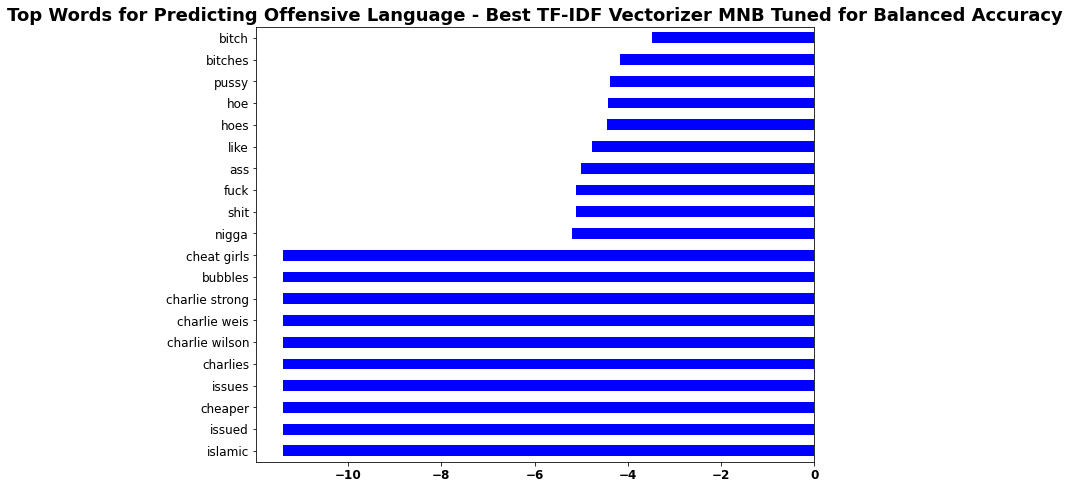

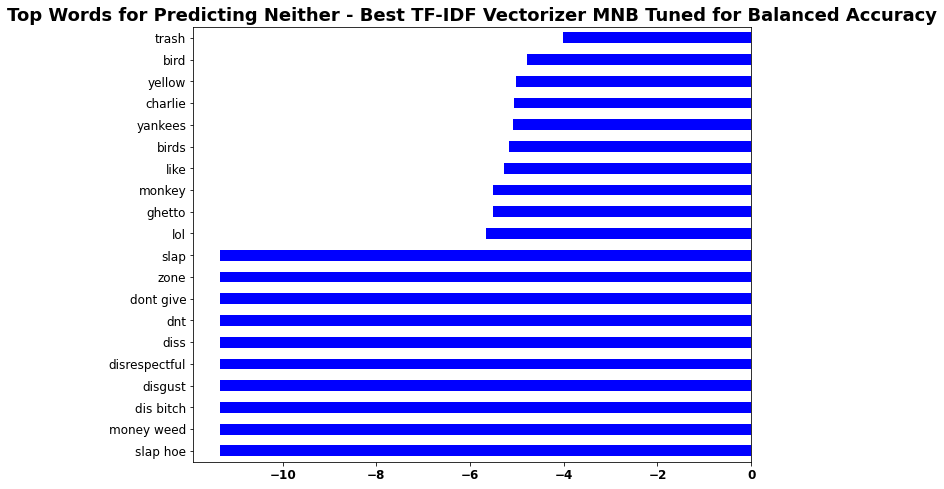

In [89]:
for i in range(0,3):
    plot_coefficients(mnb_tfidf_bacc_grid.best_estimator_, 'mnb', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer MNB Tuned for Balanced Accuracy')

## Hyperparameter Tuning for LinearSVC

### Tuning Count Vectorizer LinearSVC Models

In [90]:
svc_cv_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'count_vec', 'svc', 'count_vec__analyzer', 'count_vec__binary', 'count_vec__decode_error', 'count_vec__dtype', 'count_vec__encoding', 'count_vec__input', 'count_vec__lowercase', 'count_vec__max_df', 'count_vec__max_features', 'count_vec__min_df', 'count_vec__ngram_range', 'count_vec__preprocessor', 'count_vec__stop_words', 'count_vec__strip_accents', 'count_vec__token_pattern', 'count_vec__tokenizer', 'count_vec__vocabulary', 'svc__C', 'svc__class_weight', 'svc__dual', 'svc__fit_intercept', 'svc__intercept_scaling', 'svc__loss', 'svc__max_iter', 'svc__multi_class', 'svc__penalty', 'svc__random_state', 'svc__tol', 'svc__verbose'])

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 07:59:27 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:00:17 AM

***** Total Training Time: 0:00:49.660720


Best Parameters:
{'count_vec__min_df': 3, 'count_vec__ngram_range': (1, 3), 'svc__C': 0.1, 'svc__class_weight': None}


--------------------------------------------------------------------------
Classification Report: Best Count Vectorizer LinearSVC Tuned for Accuracy
--------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.71      0.53      0.60       286
   Offensive       0.87      0.89      0.88       881
     Neither       0.90      0.96      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.86      0.86      0.86      2000

---

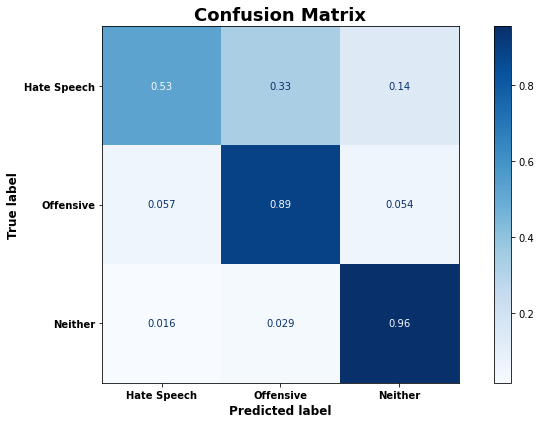

In [91]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_cv_acc_grid = fit_grid_clf(svc_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer LinearSVC Tuned for Accuracy',
                       score='accuracy')

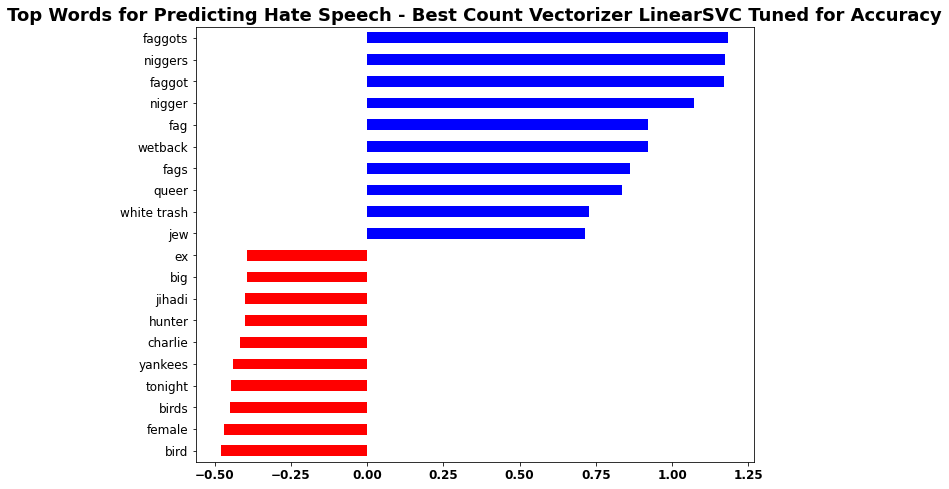

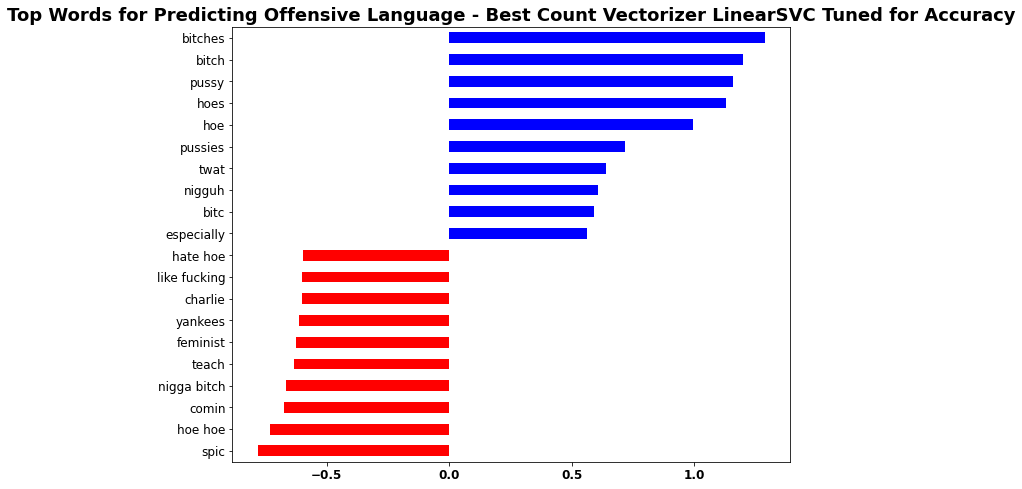

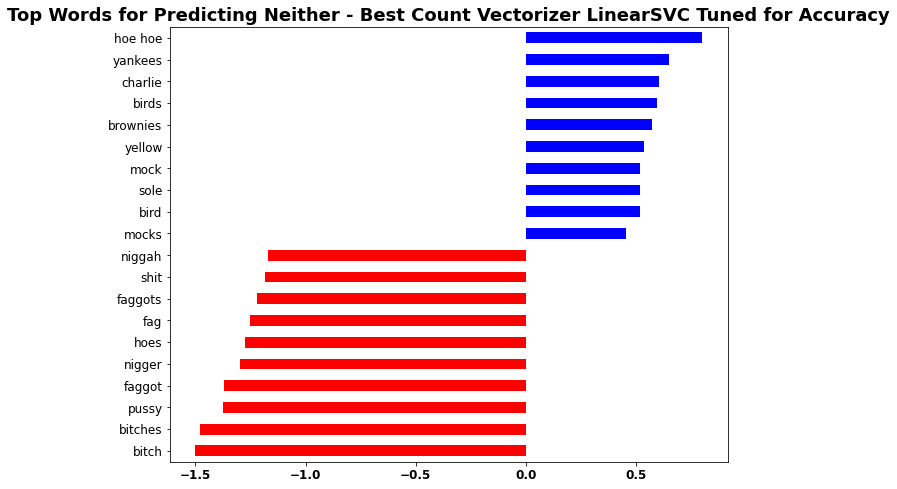

In [92]:
for i in range(0,3):
    plot_coefficients(svc_cv_acc_grid.best_estimator_, 'svc', 'count_vec', i,
                      'Best Count Vectorizer LinearSVC Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:00:18 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:01:08 AM

***** Total Training Time: 0:00:49.899117


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 3), 'svc__C': 0.1, 'svc__class_weight': 'balanced'}


-----------------------------------------------------------------------------------
Classification Report: Best Count Vectorizer LinearSVC Tuned for Balanced Accuracy
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.66      0.63      0.64       286
   Offensive       0.88      0.86      0.87       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.86  

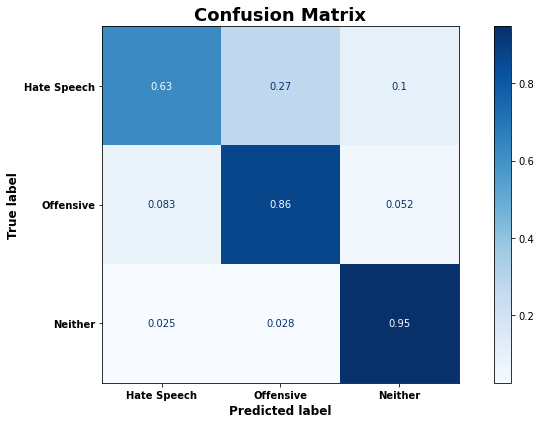

In [93]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_cv_bacc_grid = fit_grid_clf(svc_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer LinearSVC Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

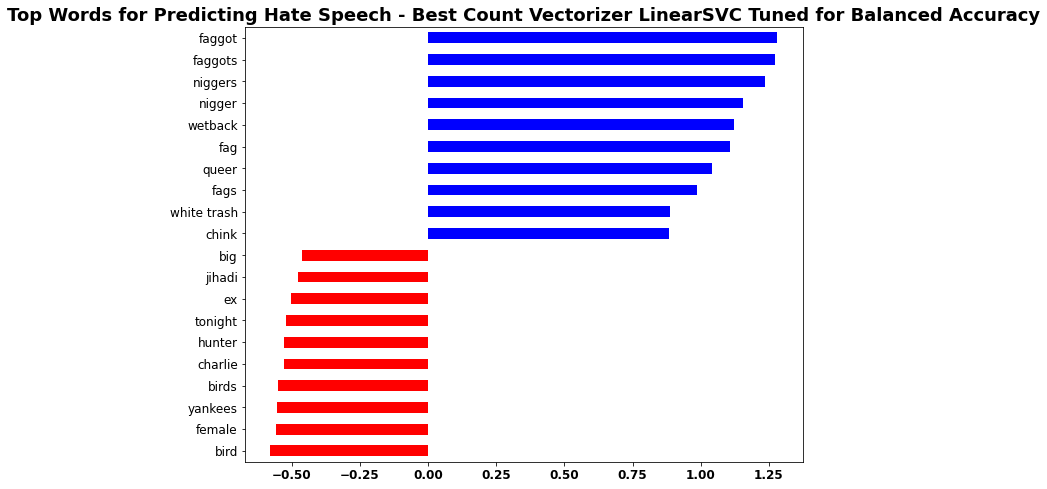

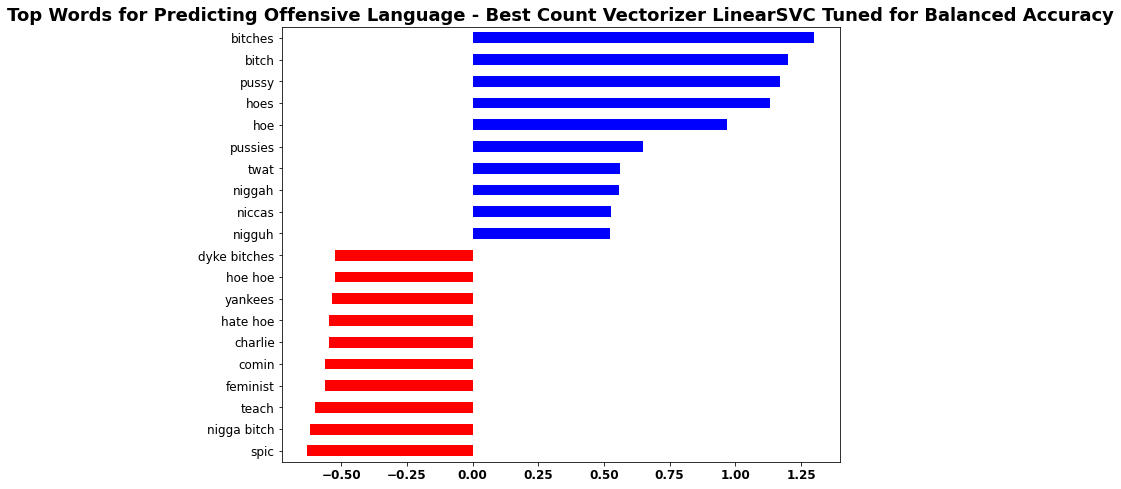

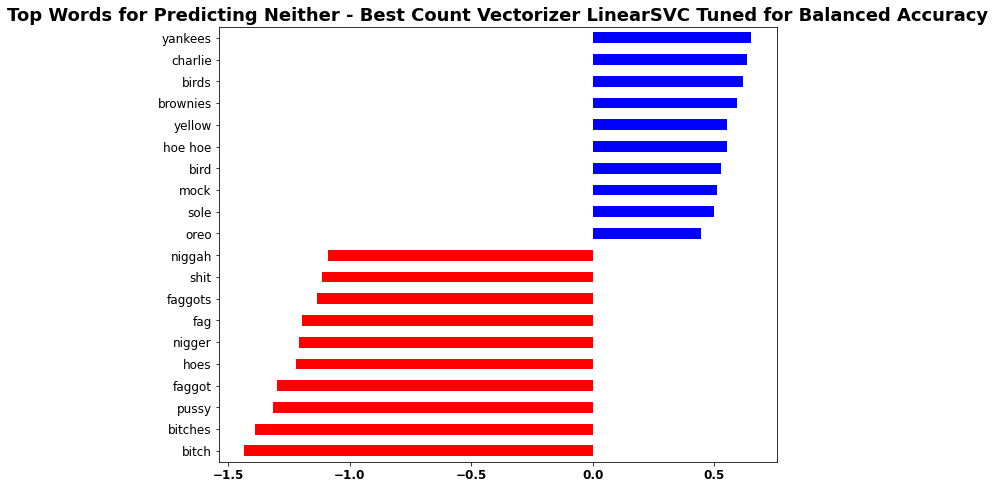

In [94]:
for i in range(0,3):
    plot_coefficients(svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', i,
                      'Best Count Vectorizer LinearSVC Tuned for Balanced Accuracy')

### Tuning TF-IDF Vectorizer LinearSVC Models

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:01:09 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:01:56 AM

***** Total Training Time: 0:00:47.200451


Best Parameters:
{'svc__C': 0.1, 'svc__class_weight': 'balanced', 'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 3)}


---------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer LinearSVC Tuned for Accuracy
---------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.70      0.59      0.64       286
   Offensive       0.89      0.87      0.88       881
     Neither       0.89      0.96      0.92       833

    accuracy                           0.87      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.86      0.87      0.86      

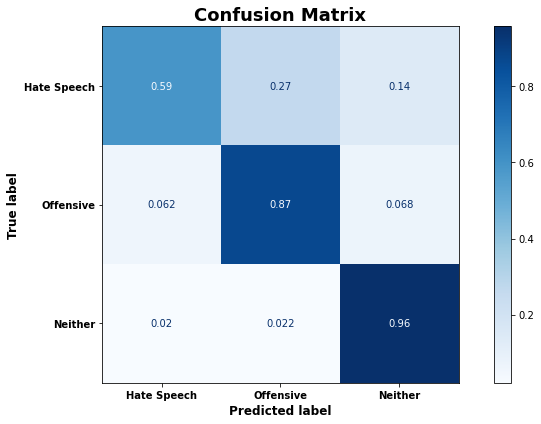

In [95]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_tfidf_acc_grid = fit_grid_clf(svc_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer LinearSVC Tuned for Accuracy',
                       score='accuracy')

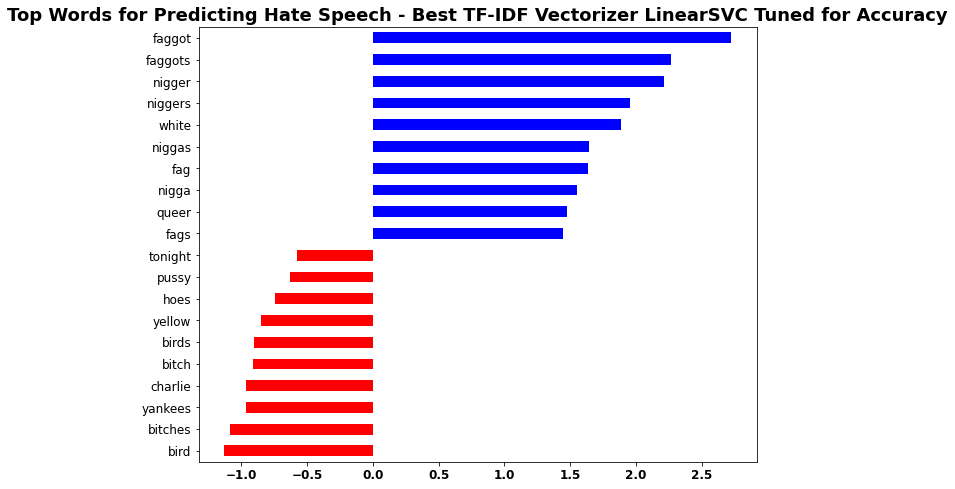

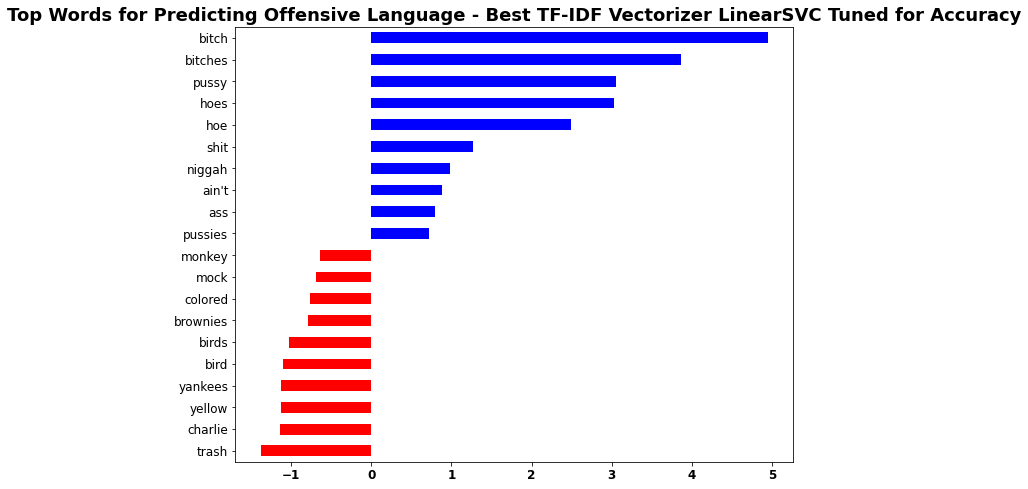

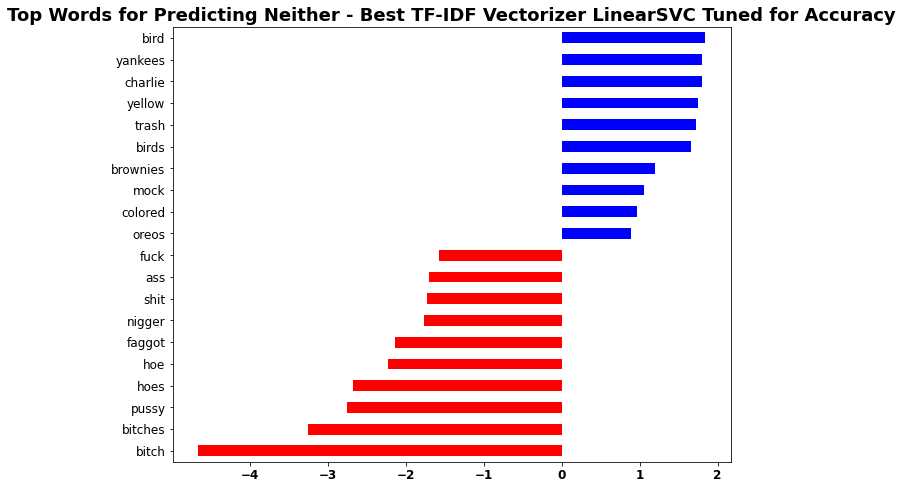

In [96]:
for i in range(0,3):
    plot_coefficients(svc_tfidf_acc_grid.best_estimator_, 'svc', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer LinearSVC Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:01:58 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:02:45 AM

***** Total Training Time: 0:00:47.818233


Best Parameters:
{'svc__C': 0.1, 'svc__class_weight': 'balanced', 'tfidf_vec__min_df': 3, 'tfidf_vec__ngram_range': (1, 3)}


------------------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer LinearSVC Tuned for Balanced Accuracy
------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.59      0.63       286
   Offensive       0.89      0.86      0.88       881
     Neither       0.89      0.96      0.92       833

    accuracy                           0.86      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.8

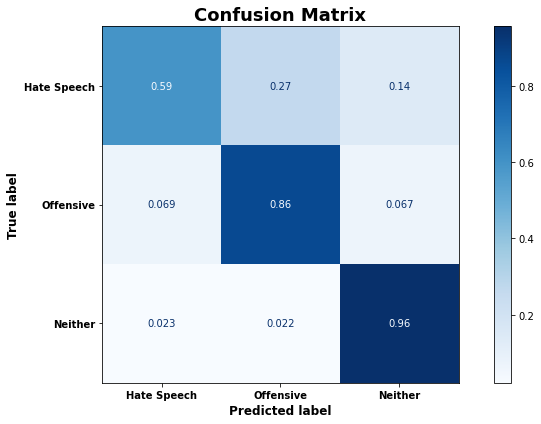

In [97]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_tfidf_bacc_grid = fit_grid_clf(svc_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer LinearSVC Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

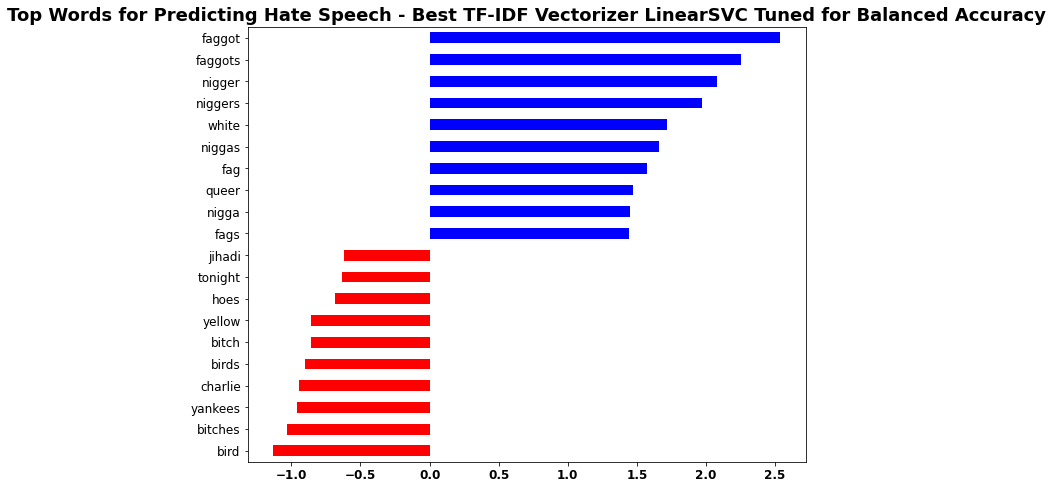

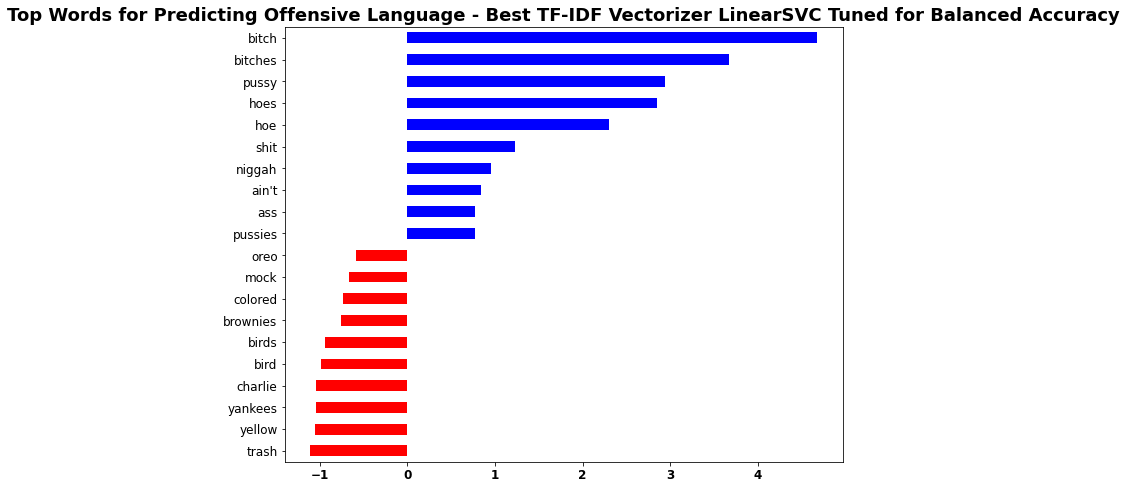

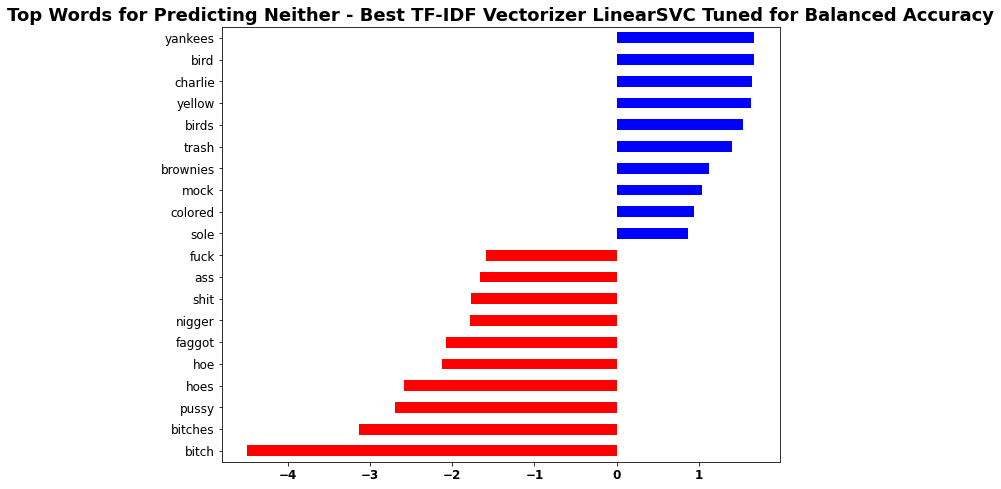

In [98]:
for i in range(0,3):
    plot_coefficients(svc_tfidf_bacc_grid.best_estimator_, 'svc', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer LinearSVC Tuned for Balanced Accuracy')

## Hyperparameter Tuning for XGB Classifiers

### Tuning Count Vectorizer XGB Models

In [99]:
xgb_cv_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'count_vec', 'svd', 'xgb', 'count_vec__analyzer', 'count_vec__binary', 'count_vec__decode_error', 'count_vec__dtype', 'count_vec__encoding', 'count_vec__input', 'count_vec__lowercase', 'count_vec__max_df', 'count_vec__max_features', 'count_vec__min_df', 'count_vec__ngram_range', 'count_vec__preprocessor', 'count_vec__stop_words', 'count_vec__strip_accents', 'count_vec__token_pattern', 'count_vec__tokenizer', 'count_vec__vocabulary', 'svd__algorithm', 'svd__n_components', 'svd__n_iter', 'svd__random_state', 'svd__tol', 'xgb__base_score', 'xgb__booster', 'xgb__colsample_bylevel', 'xgb__colsample_bynode', 'xgb__colsample_bytree', 'xgb__gamma', 'xgb__learning_rate', 'xgb__max_delta_step', 'xgb__max_depth', 'xgb__min_child_weight', 'xgb__missing', 'xgb__n_estimators', 'xgb__n_jobs', 'xgb__nthread', 'xgb__objective', 'xgb__random_state', 'xgb__reg_alpha', 'xgb__reg_lambda', 'xgb__scale_pos_weight', 'xgb__seed', 'xgb__silent', 'xgb__subsample', 'xgb__v

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:02:47 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:10:48 AM

***** Total Training Time: 0:08:00.973804


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 2), 'xgb__colsample_bytree': 0.7, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


--------------------------------------------------------------------
Classification Report: Best Count Vectorizer XGB Tuned for Accuracy
--------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.74      0.40      0.52       286
   Offensive       0.87      0.88      0.87       881
     Neither       0.84      0.97      0.90       833

    accuracy                           0.85      2000
   macro avg       0.82      0.75      0.76      2000
weighted avg       0.84      0.85      0.83 

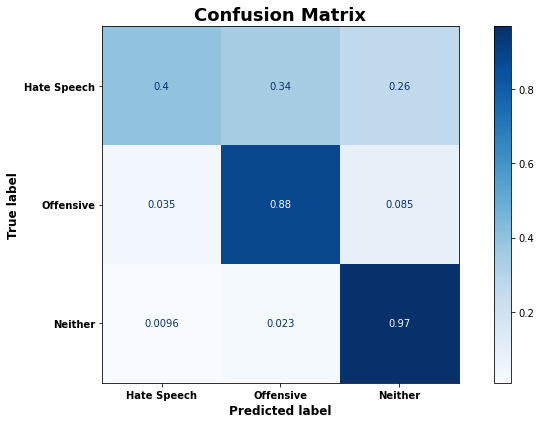

In [100]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_cv_acc_grid = fit_grid_clf(xgb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer XGB Tuned for Accuracy',
                       score='accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:10:48 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:18:47 AM

***** Total Training Time: 0:07:58.338336


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 1), 'xgb__colsample_bytree': 0.7, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


-----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer XGB Tuned for Balanced Accuracy
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.72      0.42      0.53       286
   Offensive       0.86      0.87      0.87       881
     Neither       0.85      0.96      0.90       833

    accuracy                           0.84      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg     

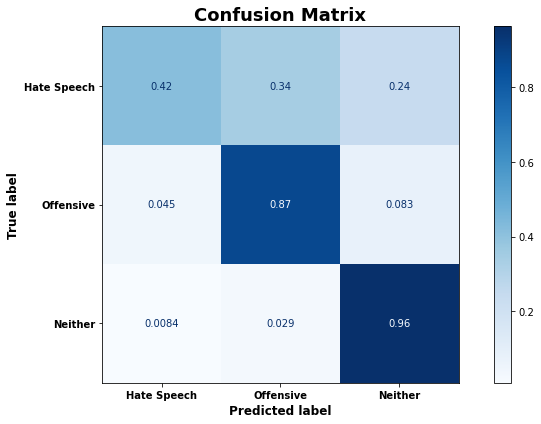

In [101]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_cv_bacc_grid = fit_grid_clf(xgb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer XGB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

### Tuning TF-IDF Vectorizer XGB Models

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:18:47 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:26:40 AM

***** Total Training Time: 0:07:52.900878


Best Parameters:
{'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2), 'xgb__colsample_bytree': 1, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


---------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer XGB Tuned for Accuracy
---------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.46      0.55       286
   Offensive       0.86      0.88      0.87       881
     Neither       0.87      0.95      0.91       833

    accuracy                           0.85      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg       0.84      0.85      0.84

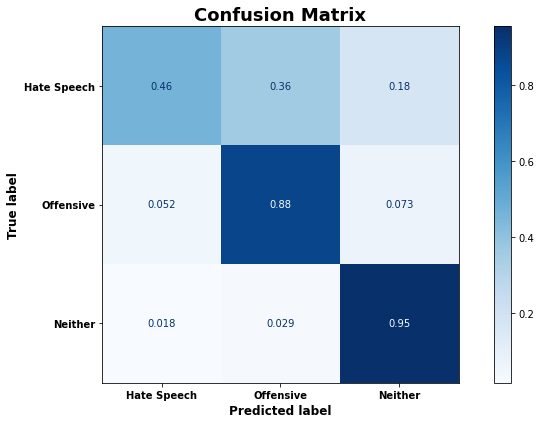

In [102]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_tfidf_acc_grid = fit_grid_clf(xgb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer XGB Tuned for Accuracy',
                       score='accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:26:41 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:34:39 AM

***** Total Training Time: 0:07:57.846729


Best Parameters:
{'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2), 'xgb__colsample_bytree': 1, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


------------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer XGB Tuned for Balanced Accuracy
------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.46      0.55       286
   Offensive       0.86      0.88      0.87       881
     Neither       0.87      0.95      0.91       833

    accuracy                           0.85      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg    

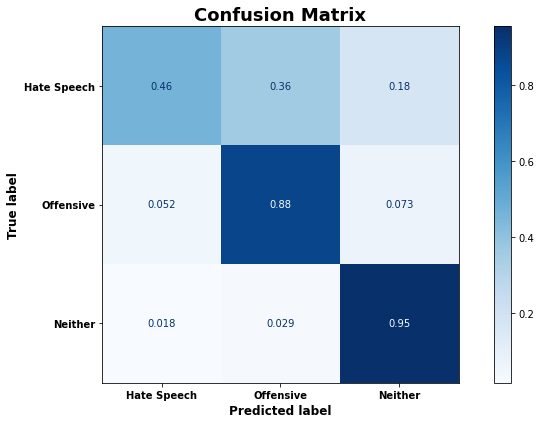

In [103]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_tfidf_bacc_grid = fit_grid_clf(xgb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer XGB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

# INTERPRET

## Final Model - Best LinearSVC

The all around best model was the LinearSVC model using the Count Vectorizer and tuned to optimize balanced accuracy. This model had one of the highest overall accuracies (84%) and by far the highest recall for correctly classifying hate speech as hate speech 63% of the time. The model retained one of the highest recalls for predicting the neither class correctly for 95% of test cases and did not sacrifice much in recall for offensive tweets, labeling that class correctly 86% of the time.

---------------------------------------------------------------------------------------
Classification Report: Best Model - Count Vector LinearSVC Tuned for Balanced Accuracy
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.66      0.63      0.64       286
   Offensive       0.88      0.86      0.87       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.86      0.86      0.86      2000

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------




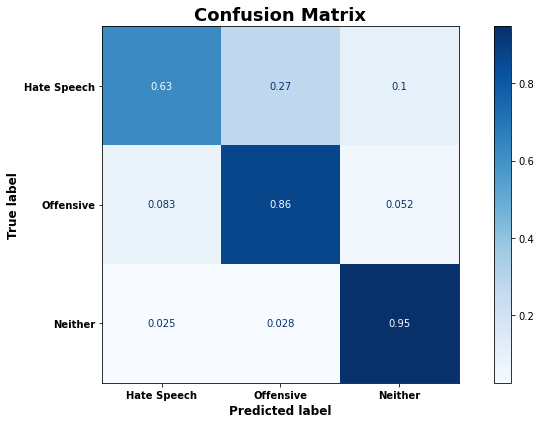

In [104]:
eval_classifier(svc_cv_bacc_grid.best_estimator_, X_test, y_test,
                model_descr='Best Model - Count Vector LinearSVC Tuned for Balanced Accuracy');

> - As shown below, the best model relied heavily on various queer and racial slurs to push it towards a classification of hate speech. The singular and plural version of many of these words show up in the top 10 positive predictors of the hate speech class. Thus, in the next subsection I trained the same model on a lemmatized version of the same training data to see if this improved model performance (it did, but barely) and to examine what additional words appear as top predictors when singular and plural versions of slurs are treated as the same word.
- Words that were most negatively associated with hate speech (in that their presence in a tweet pushed the model towards either offensive language or neither) mostly seem fairly random and benign ("big", "tonight", "hunter", and "charlie". "Female" may show up because if someone is using that word then they are probably using it rather than words like "bitch(es)" and "ho/e(s)" which were major positive predictors of offensive language tweets. However "bird(s)", while obviously commonly referring to a type of animal can also be used as a slang term usually to refer to white people. From <a href="https://www.urbandictionary.com/define.php?term=bird">Urban Dictionary</a>, the term bird can refer to "a mentality developed by basic women often aged 18-25, often white (although can be any ethnic background)" or "generally a girl or young woman who comes across as vain, ditzy, stupid or useless." 

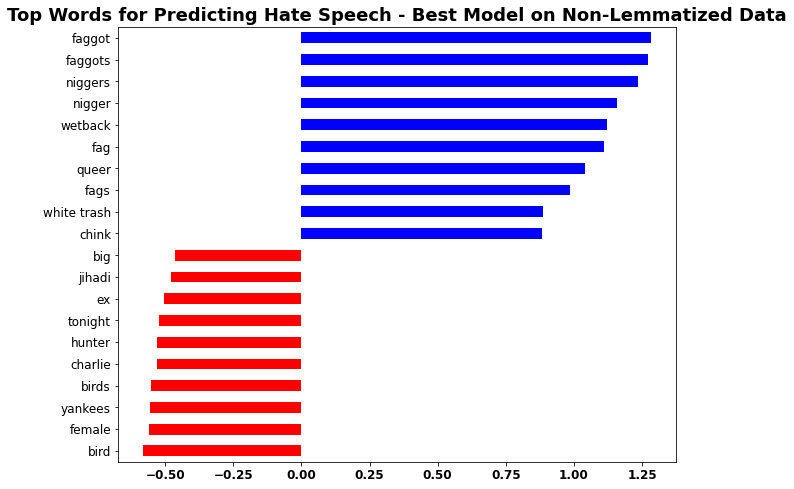

In [375]:
plot_coefficients(svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', 0,
                      'Best Model on Non-Lemmatized Data');

> - Shown below, words that most strongly push the model towards a classification of "offensive language" fall into two general categories: terms that are offensive and derogative of women and femininity ("bitch(es)", ("hoe(s)", "pussy/ies", and "twat") and modified versions of the n-word ("niggah", "niccas", "nigguh"). These words are less common in hate speech, but are definitely deemed offensive by most people. 
- As seen for predicting hate speech, the model relies most heavily on positive predictors rather than negative predictors. Some top negative predictors of offensive language are terms that would be more indicative of hate speech (but that interestingly did not make the top list for hate speech) such as "spic" and "dyke bitches". 

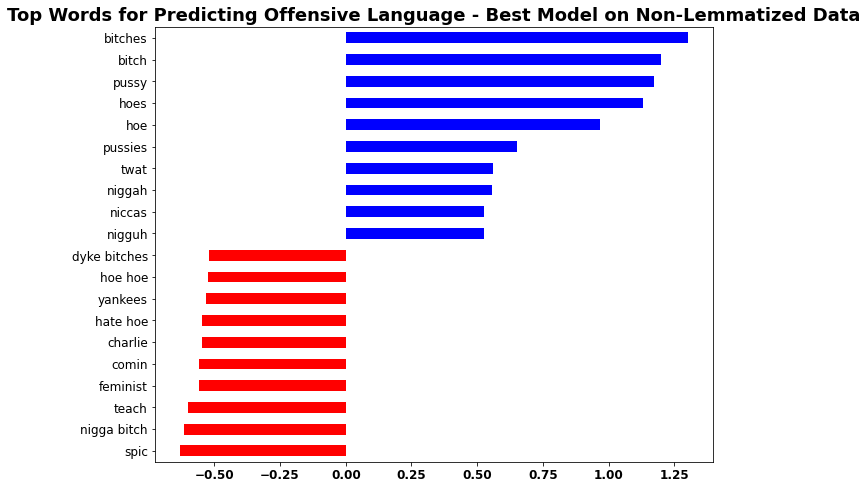

In [378]:
plot_coefficients(svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', 1,
                      'Best Model on Non-Lemmatized Data');

>- As shown below, predictions of the "neither" class are most influenced by negative coefficients rather than positive coefficients. Basically the inclusion of the terms represented by red bars strongly push the model to predict a different class (either hate speech or offensive language). The inclusion of any particular word does not strongly indicate that the tweet belongs to the neither class, so essentially the model is ruling out those two classes before predicting neither. This would explain why the top positive coefficients are fairly small and the words themselves seem relatively random. The top positive predictors of the neither class would likely vary quite a bit depending on the sample of training data. However, the top negative predictors of the neither class are unlikely to vary much as those are generally extremely indicative of hate speech and/or offensive language. In fact, the list of top negative predictors consists entirely of curse words and slurs.

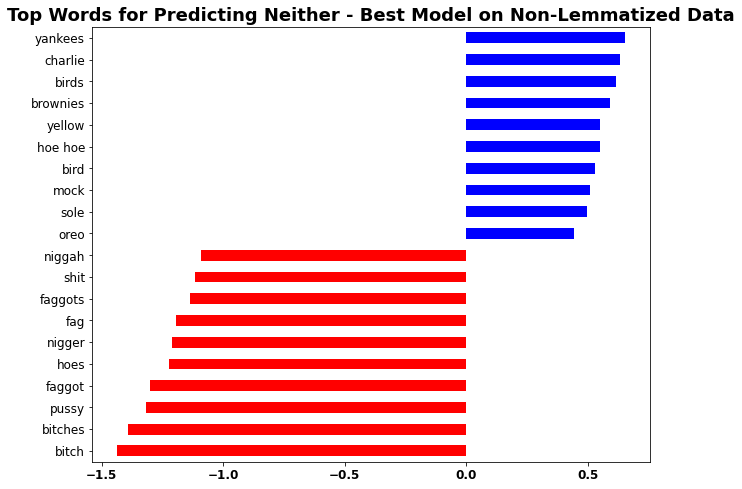

In [379]:
plot_coefficients(svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', 2,
                      'Best Model on Non-Lemmatized Data');

## Final Model Trained on Lemmatized Data

>- Since many of the top predictors of hate speech and offensive language were the singular and plural versions of slurs, lemmatizing the data to convert plurals into singulars may improve model performance. Below I fit and evaluate a model on the same train-test split used for all other models, but with a lemmatized version of the text. The lemmatized version of the best model performs marginally better with the same overall accuracy of the original model (86%) and 65% recall of hate speech (a slight improvement over the original 63%) with a slight decrease in recall for the neither class (from 95% to 94%). Since this model performs slightly better for the class of interest without unnecessarily flagging many more inoffensive ("neither") tweets as hate speech, I consider this the best modeling approach and will focus the rest of the interpretation and the recommendations on this model.

In [105]:
## Display parameters for best model
svc_cv_bacc_grid.best_params_

{'count_vec__min_df': 2,
 'count_vec__ngram_range': (1, 3),
 'svc__C': 0.1,
 'svc__class_weight': 'balanced'}

------------------------------------------------------------
***** Grid Search Started at 10/30/20 - 08:34:40 AM
------------------------------------------------------------


***** Training Completed at 10/30/20 - 08:34:41 AM

***** Total Training Time: 0:00:01.031568


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 3), 'svc__C': 0.1, 'svc__class_weight': 'balanced'}


-------------------------------------------------------
Classification Report: Best Model on Lemmatized Data
-------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.65      0.65      0.65       286
   Offensive       0.89      0.86      0.87       881
     Neither       0.91      0.94      0.92       833

    accuracy                           0.86      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.86      0.86      0.86      2000

-------------------------------------------------------


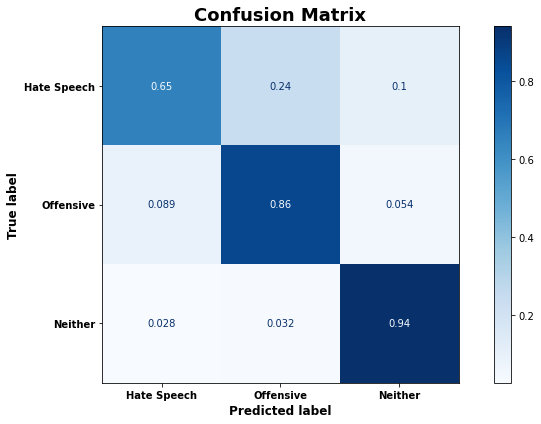

In [106]:
## Train a model on the lemmatized data using the parameters of the best model
params = {'count_vec__min_df': [2],
          'count_vec__ngram_range': [(1, 3)],
          'svc__C': [0.1],
          'svc__class_weight': ['balanced']}

lemma_svc_cv_bacc_grid = fit_grid_clf(svc_cv_pipe, params, 
                       X_lemma_train, y_lemma_train,
                       X_lemma_test, y_lemma_test,
                       model_descr='Best Model on Lemmatized Data',
                       score='balanced_accuracy')

> - As shown below and previously seen for the same model trained on non-lemmatized data, this model relies heavily on various queer and racial slurs to push it towards a classification of hate speech. The original singular predictors show up in addition to "jew", "feminist", and "dyke".  
- Words that were most negatively associated with hate speech (in that their presence in a tweet pushed the model towards either offensive language or neither) stayed mostly the same. 

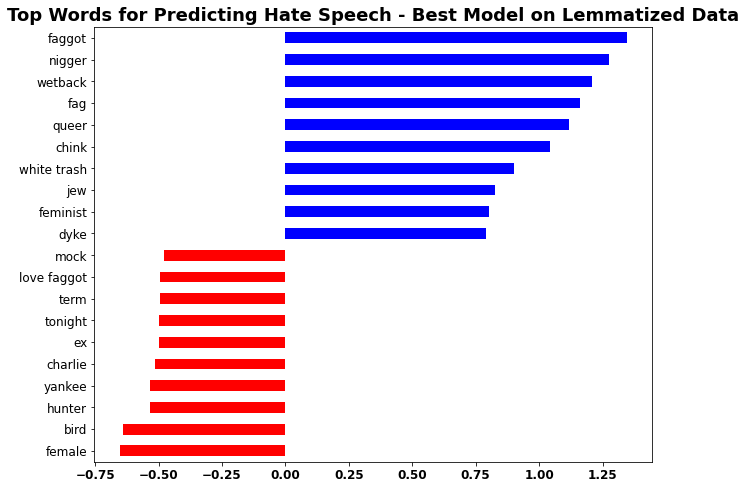

In [381]:
plot_coefficients(lemma_svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', 0,
                      'Best Model on Lemmatized Data');

> - As before, words that most strongly push the model towards a classification of "offensive language" fall into two general categories: terms that are offensive and derogative of women and femininity and modified versions of the n-word. These words are less common in hate speech, but are definitely deemed offensive by most people. The words are the main predictors of offensive language and the model trained on lemmatized data is starting to give weight to words like "especially" which are not inherently offensive.

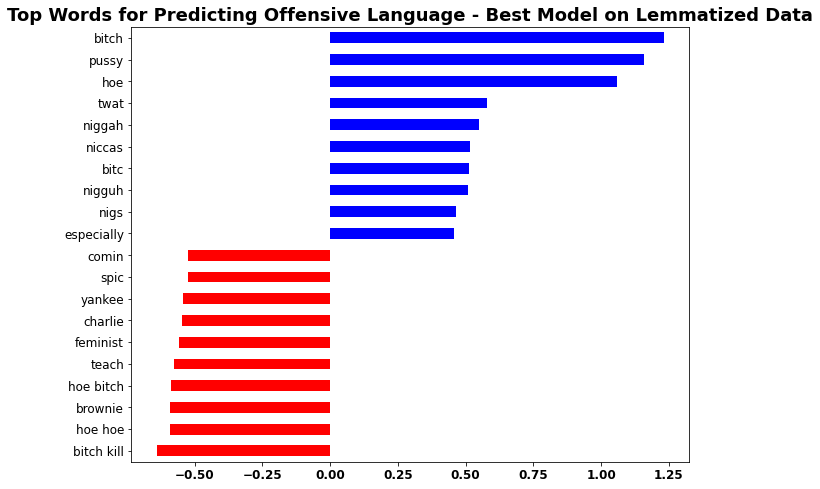

In [382]:
plot_coefficients(lemma_svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', 1,
                      'Best Model on Lemmatized Data');

>- As seen before, predictions of the "neither" class are most influenced by negative coefficients rather than positive coefficients. The inclusion of any particular word does not strongly indicate that the tweet belongs to the neither class, so essentially the model is ruling out those two classes before predicting neither. This would explain why the top positive coefficients are fairly small and the words themselves seem relatively random. Once again, the top negative predictors of the neither class are curse words and slurs.

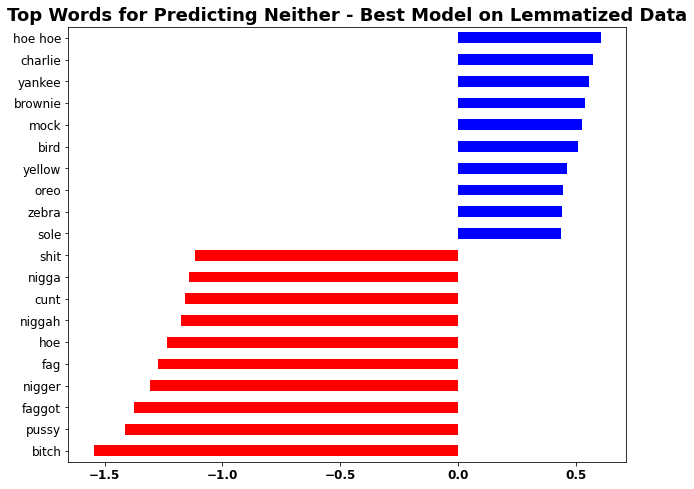

In [383]:
plot_coefficients(lemma_svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', 2,
                      'Best Model on Lemmatized Data');

In [250]:
## Create DataFrame of incorrect predictions
row_index_list = []
incorrect_pred_list = []
true_label_list = []
tweet_list = []
stop_tokens_list = []
lemma_tokens_list = []
hate_count = []
off_count = []
neither_count = []
total_count = []

class_dict = {0: 'hate speech', 1: 'offensive', 2: 'neither'}
for row_index, (input, X_lemma_idx,
                prediction, label) in enumerate(zip (X_lemma_test, list(X_lemma_test.index),
                                                     svm_predictions, y_lemma_test)):
    if prediction != label:
        # col for row index (which prediction of X_lemma_test's 2000 samples)
        row_index_list.append(row_index)
        # col for model's prediction (as class name, not code)
        incorrect_pred_list.append(class_dict[prediction])
        # col for true label (as class name, not code) 
        true_label_list.append(class_dict[label])
        # col for hate speech vote count 
        hate_count.append(df.iloc[X_lemma_idx]['hate_speech'])
        # col for offensive lang vote count 
        off_count.append(df.iloc[X_lemma_idx]['offensive_language'])
        # col for neither vote count 
        neither_count.append(df.iloc[X_lemma_idx]['neither'])
        # col for total vote count 
        total_count.append(df.iloc[X_lemma_idx]['count'])
        # col for tweet text
        tweet_list.append(df.iloc[X_lemma_idx]['tweet'])
        # col for stopped tokens
        stop_tokens_list.append(df.iloc[X_lemma_idx]['tokens_stopped'])
        # col for lemmatized tokens
        lemma_tokens_list.append(df.iloc[X_lemma_idx]['lemma_tokens'])

        
incorrect_preds = zip(row_index_list, incorrect_pred_list,
                      true_label_list, hate_count, off_count,
                      neither_count, total_count, tweet_list,
                      stop_tokens_list, lemma_tokens_list)

incorrect_preds_df = pd.DataFrame(incorrect_preds, 
                                  columns=['row index', 'prediction',
                                           'true label', 'hate votes',
                                           'off votes', 'neither votes',
                                           'total votes', 'text', 
                                           'stopped tokens', 'lemma tokens'])

# Create new cols in df based on proportion of votes per category
incorrect_preds_df['proportion hate'] = incorrect_preds_df['hate votes'] / incorrect_preds_df['total votes']
incorrect_preds_df['proportion off'] = incorrect_preds_df['off votes'] / incorrect_preds_df['total votes']
incorrect_preds_df['proportion neither'] = incorrect_preds_df['neither votes'] / incorrect_preds_df['total votes']

# Create column noting predict is incorrect for concatenating prediction dfs
incorrect_preds_df['correct'] = 0

# incorrect_preds_df

## Create DataFrame of correct predictions
row_index_list = []
pred_list = []
true_label_list = []
tweet_list = []
stop_tokens_list = []
lemma_tokens_list = []
hate_count = []
off_count = []
neither_count = []
total_count = []

class_dict = {0: 'hate speech', 1: 'offensive', 2: 'neither'}
for row_index, (input, X_lemma_idx,
                prediction, label) in enumerate(zip (X_lemma_test, list(X_lemma_test.index),
                                                     svm_predictions, y_lemma_test)):
    if prediction == label:
        # col for row index (which prediction of X_lemma_test's 2000 samples)
        row_index_list.append(row_index)
        # col for model's prediction (as class name, not code)
        pred_list.append(class_dict[prediction])
        # col for true label (as class name, not code) 
        true_label_list.append(class_dict[label])
        # col for hate speech vote count 
        hate_count.append(df.iloc[X_lemma_idx]['hate_speech'])
        # col for offensive lang vote count 
        off_count.append(df.iloc[X_lemma_idx]['offensive_language'])
        # col for neither vote count 
        neither_count.append(df.iloc[X_lemma_idx]['neither'])
        # col for total vote count 
        total_count.append(df.iloc[X_lemma_idx]['count'])
        # col for tweet text
        tweet_list.append(df.iloc[X_lemma_idx]['tweet'])
        # col for stopped tokens
        stop_tokens_list.append(df.iloc[X_lemma_idx]['tokens_stopped'])
        # col for lemmatized tokens
        lemma_tokens_list.append(df.iloc[X_lemma_idx]['lemma_tokens'])

        
correct_preds = zip(row_index_list, pred_list,
                      true_label_list, hate_count, off_count,
                      neither_count, total_count, tweet_list,
                      stop_tokens_list, lemma_tokens_list)

correct_preds_df = pd.DataFrame(correct_preds, 
                                  columns=['row index', 'prediction',
                                           'true label', 'hate votes',
                                           'off votes', 'neither votes',
                                           'total votes', 'text', 
                                           'stopped tokens', 'lemma tokens'])

# Create new cols in df based on proportion of votes per category
correct_preds_df['proportion hate'] = correct_preds_df['hate votes'] / correct_preds_df['total votes']
correct_preds_df['proportion off'] = correct_preds_df['off votes'] / correct_preds_df['total votes']
correct_preds_df['proportion neither'] = correct_preds_df['neither votes'] / correct_preds_df['total votes']

# Create column noting predict is incorrect for concatenating prediction dfs
correct_preds_df['correct'] = 1

# correct_preds_df

In [367]:
mislabeled_hate_speech = incorrect_preds_df.groupby('true label').get_group('hate speech')
# mislabeled_hate_speech

In [ ]:
predictions_df = pd.concat([incorrect_preds_df, correct_preds_df], axis=0)
# predictions_df

predictions_hate_df = predictions_df.groupby('true label').get_group('hate speech')
# predictions_hate_df

> - It's possible that the model had difficulty classifying tweets which the human voters were also inconsistent at classifying since the perception of hate speech is likely to vary from person to person. The graph below investigates a possible trend here by examining the relationship between what the model labeled a hate speech tweet as and the proportion of voters that agreed the tweet was hate speech.

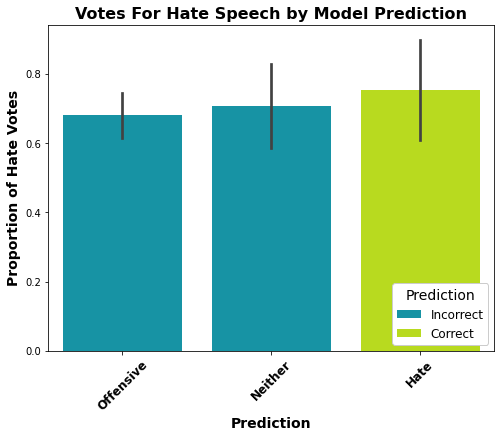

In [391]:
## Create a plot to examine any differences between model predicted classes in 
 ## the proportion of total votes for hate speech for tweets labeled as hate speech 
plt.figure(figsize=(8,6))
fig = sns.barplot(x='prediction',
                      y='proportion hate',
                      palette='nipy_spectral',
                      hue='correct',
                      data=predictions_hate_df,
                      dodge=False,
                      ci='sd')
labels = ['Incorrect', 'Correct']
fig.set_title('Votes For Hate Speech by Model Prediction', fontsize=16, weight='bold')
fig.set_xlabel('Prediction', fontsize=14, weight='bold')
fig.set_ylabel('Proportion of Hate Votes', fontsize=14, weight='bold')
fig.set_xticklabels(['Offensive', 'Neither', 'Hate'], rotation=45, fontsize=12, weight='bold')
h, l = fig.get_legend_handles_labels()
fig.legend(h, labels, title='Prediction', title_fontsize=14, fontsize=12, loc=4, framealpha=1);

> - It does not appear that there was much difference across model predictions in terms of how mixed the voters were in classifying something as hate speech. Correct classifications of hate speech may have been more likely for tweets where the voters more consistently classified the tweet as hate speech, but the difference among predicted classes is not very substantial. Most tweets only received 3 votes total (mode=3, mean=3.21, max=9), and with so few votes per tweet and thus so little variation, it would be difficult to detect a pattern.

In [253]:
hs_as_off = mislabeled_hate_speech.groupby('prediction').get_group('offensive')
print_full_tweet(hs_as_off, title='Hate Speech Mislabeled as Offensive Language')

************************************************************ 

Hate Speech Mislabeled as Offensive Language 

Number of tweets: 78 

************************************************************ 

0 I hate you niccas! Lol http://t.co/NqSYeQhGOZ 
 ------------------------------------------------------------ 

1 RT'in your own shit now pussy what a joke you'd end up just like all the rest no show chicken shit mother fucker 
 ------------------------------------------------------------ 

2 Fredo was a bitch ass nigga. How niggas fire over 20 shots at his pops but he didn't get off 1 cuz he dropped the gun smh 
 ------------------------------------------------------------ 

3 RT @HG_Shit: Mfs still in the same spot as 3yrs ago. Beefing with the same nighas. Sleeping with the same hoes. Eating from the same restau&#8230; 
 ------------------------------------------------------------ 

4 RT @YABOYLILB: If I ride up to your bitch in these then... homie consider yourself a single nigga. http://

Of the 78 hate speech tweets incorrectly labeled as merely 'offensive language' by the model, several of them do not clearly appear to be hate speech at least to me. 
 - For example, the following tweet certainly contains language most would classify as offensive. However, in the context it appears this appears to possibly be an overall positive tweet and may be an example of a minority group reclaiming a slur for their own use. <br> **15: Wish I coulda said more to @EmmaleeeParkerr tonight. Good seeing you fag. &#128540;** <br>
 - In another example, the following tweet is certainly offensive and uses what is now considered a slur for referring to those with intellectual disabilities. However, it is not targeting any specific person or inciting violence or harm against a marginalized group. As such, it is not clear cut that this violates Twitter's hateful conduct policy. <br> **27: DeeDee, Patrick, Ed, Sheen, Timmy's Dad, Beavis &amp; Butthead, Peter Griffin. This is just a list of SOME mentally retarded cartoon characters.** 
 - Certain versions of the n-word such as "nigga", "nicca", "niggah", and "nigguh" are frequently used by black people in a way that reclaims the original word. While many people still regard these versions as offensive, especially when appropriated by other racial groups, these words are not as strongly associated with clear cut hate speech as the original (n\***er). So depending on context and who is using the word, the following tweets are some examples that voters classified as hate speech but that the model labeled as 'offensive':
   - **55: ' Happppppy Birthdayyyy &#1041191;&#1041196;&#1043215; lol . Niggahs is really 21 in this bitch &#1043358;&#1041219; . http://t.co/YatU7pbsHX**
   - **63: "Don't worry about the nigga you see, worry about the nigga you DON'T see... Dat's da nigga fuckin yo bitch."**
   - **44: RT @xDSmooth: The way this niggah just flinched at this movie was #priceless @1BookieG**
 - Similar to the above, the word "hoe" shows up several times in a way that I'm not sure can clearly be considered hate speech, and not just offensive language. Again, depending on who is using the word and the context, the following may or may not be considered hate speech against women:
   - **74: Lmao let these hoes be hoes ain't no Savin nem**
   - **18: Fucking with these hoes nigga don't be no dumby**<br><br>
   
One area where the model was weak in correctly classifying hate speech and misclassifying it as merely offensive language were instances of direct threats, wishing someone harm, or the use of slurs to degrade specific inidividuals such as the following:
 - **12: @IWantHis_Heart Ok u fat precious lookin ass bitch, u big fat back at the barnyard lookin ass bitch. I can fix my grammar but u still fat**
 - **22: @kieffer_jason here let me say it more clearly since your retarded ass don't understand**
 - **41: Lol you're a cunt liar and I hope you drop dead k :-)**
 - **53: @QUAN1T0 You retarded bruh lol**
 - **65: @sho_time_ @MitchVorce chill ur pussy gay af**
 - **72 RT @__bettyboo: You better pray I don't send your nudes out bitch**
 - **75 it means that im following orders and being subordinate. sue me, ya dyke** <br>

This issue might be partially addressed by incorporating whether or not a tweet tags someone when such derogatory and/or threatening language is used. However this would not catch cases where no specific individual is tagged or when these statements are made about protected categories.

In [254]:
hs_as_neither = mislabeled_hate_speech.groupby('prediction').get_group('neither')
print_full_tweet(hs_as_neither, title='Hate Speech Mislabeled as Neither')

************************************************************ 

Hate Speech Mislabeled as Neither 

Number of tweets: 29 

************************************************************ 

0 So I decided to drive to the good walmart where the colored folks don't go bc it's food here. 
 ------------------------------------------------------------ 

1 @yawlknow @HoskinsTy96 "all of these rednecks and none of them can keep the fire lit" &#128514;&#128514; 
 ------------------------------------------------------------ 

2 Not trying to follow any spooks, no offense ... 
 ------------------------------------------------------------ 

3 @BraxCity29 @maria_obregon_g @sophia_freeman1 3/4 of a citizen. I said it for you maria you spic 
 ------------------------------------------------------------ 

4 looking like a hillbilly and not matching is what I do best goodnight losers http://t.co/caGHBLKAXQ 
 ------------------------------------------------------------ 

5 @AnthonyCumia 
You be totally corr

Of the 29 hate speech tweets incorrectly labeled as neither hate speech nor 'offensive language' by the model, a few do not seem to be clear cut as hate speech. 
 - For example, the following tweet is someone referring to herself and it's not particularly hateful. Voters that classified this tweet as hate speech may have objected to the use of the word "hillbilly", but she's applying the word to herself and there is no ill intent. <br> **4 looking like a hillbilly and not matching is what I do best goodnight losers http://t.co/caGHBLKAXQ** <br>
 - In another example, the following tweet is not hate speech if "Yankees" is referring to a team. Team rivalries exist and there is no threat or actual ill intent to the team in this tweet. Simply saying that you hate something does not constitute hate speech. <br> **8: @erinscafe We hate the Yankees though, right? I feel like I'm really good at hating them.** 
 - As seen above, certain versions of the n-word such as "nigga", "nicca", "niggah", and "nigguh" are frequently used by black people in a way that reclaims the original word. While many people still regard these versions as offensive, especially when appropriated by other racial groups, these words are not as strongly associated with clear cut hate speech as the original (n\***er). So depending on context and who is using the word, the following tweets are some examples that voters classified as hate speech but that the model labeled as 'offensive':
   - **17: Told my dad to go buy cookies for the graduation reception...this nigga bought Oreos.**
   - **23: I already know you trash if being tatted is on the list of things you want in a nigga..**<br><br>
   
Again, one area where the model was weak in correctly classifying hate speech and misclassifying it as neither hate speech nor offensive language were instances of direct threats, wishing someone harm, or the use of slurs to degrade specific inidividuals such as the following:
 - **3: @BraxCity29 @maria_obregon_g @sophia_freeman1 3/4 of a citizen. I said it for you maria you spic**
 - **13: "@NotoriousBM95: @_WhitePonyJr_ Ariza is a snake and a coward" but at least he isn't a cripple like your hero Roach lmaoo**
 - **15: Of course my #faith for #baseball is off this year. BECAUSE OF #BARRYBONDS you goddamn retards!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #morons**
 - **21: @EvanDMyers @nineinchessoft you have a redneck attitude. The same people that think Benghazzi is real think Fox fake nws is real. Your one**
 - **22: @Flow935 jus wanted to let y&#225;ll know hope the hurricane kills your soca sunday trash #LORDWILLIN** <br>

This issue might be partially addressed by incorporating whether or not a tweet tags someone when such derogatory and/or threatening language is used. However this would not catch cases where no specific individual is tagged or when these statements are made about protected categories.<br>

The model also had issues picking up on less commonly used slurs such as "coon", "spic", "spook", "colored people/folks", "muzzies", "raghead", "monkey", and modified versions of the n-word such as "niggerous" and "niggress". It also did not pick up very well on slang commonly used to refer to white people such as "redneck" and "bird". 
 

In [384]:
mislabeled_hate_speech.groupby('prediction').get_group('offensive')

,row index,prediction,true label,hate votes,off votes,neither votes,total votes,text,stopped tokens,lemma tokens,proportion hate,proportion off,proportion neither,correct
0,4,offensive,hate speech,2,1,0,3,I hate you niccas! Lol http://t.co/NqSYeQhGOZ,"[hate, niccas, lol]","[hate, niccas, lol]",0.666667,0.333333,0.000000,0
2,13,offensive,hate speech,2,1,0,3,RT'in your own shit now pussy what a joke you'...,"[shit, pussy, joke, end, like, rest, show, chi...","[shit, pussy, joke, end, like, rest, show, chi...",0.666667,0.333333,0.000000,0
3,22,offensive,hate speech,2,1,0,3,Fredo was a bitch ass nigga. How niggas fire o...,"[fredo, bitch, ass, nigga, niggas, fire, shots...","[fredo, bitch, nigga, nigga, fire, shot, pop, ...",0.666667,0.333333,0.000000,0
11,96,offensive,hate speech,2,1,0,3,RT @HG_Shit: Mfs still in the same spot as 3yr...,"[mfs, still, spot, yrs, ago, beefing, nighas, ...","[mf, still, spot, yr, ago, beefing, nighas, sl...",0.666667,0.333333,0.000000,0
12,102,offensive,hate speech,2,1,0,3,RT @YABOYLILB: If I ride up to your bitch in t...,"[ride, bitch, homie, consider, single, nigga]","[ride, bitch, homie, consider, single, nigga]",0.666667,0.333333,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1906,offensive,hate speech,2,1,0,3,@garrett_winker wow u hoe is the term for women,"[wow, hoe, term, women]","[wow, hoe, term, woman]",0.666667,0.333333,0.000000,0
260,1940,offensive,hate speech,2,1,0,3,Lmao let these hoes be hoes ain't no Savin nem,"[lmao, let, hoes, hoes, ain't, savin, nem]","[lmao, let, hoe, hoe, ain't, savin, nem]",0.666667,0.333333,0.000000,0
262,1952,offensive,hate speech,2,0,1,3,it means that im following orders and being su...,"[means, following, orders, subordinate, sue, y...","[mean, following, order, subordinate, sue, ya,...",0.666667,0.000000,0.333333,0
264,1980,offensive,hate speech,2,1,0,3,Lmao! You niggas regionally picky about hoes n...,"[lmao, niggas, regionally, picky, hoes, say, a...","[lmao, nigga, regionally, picky, hoe, say, any...",0.666667,0.333333,0.000000,0


In [386]:
hate_as_off_tokens = get_token_list(mislabeled_hate_speech.groupby('prediction').get_group('offensive'),
                                    'lemma tokens', freq=True)


********** lemma tokens Summary **********

Number of unique words = 350


,token,count
0,bitch,39
1,nigga,25
2,hoe,22
3,like,9
4,fuck,9
5,pussy,7
6,fat,7
7,lol,6
8,shit,5
9,get,5


In [387]:
hate_as_neither_tokens = get_token_list(mislabeled_hate_speech.groupby('prediction').get_group('neither'),
                                    'lemma tokens', freq=True)


********** lemma tokens Summary **********

Number of unique words = 180


,token,count
0,trash,5
1,good,4
2,like,4
3,colored,3
4,go,3
5,redneck,3
6,think,3
7,folk,2
8,none,2
9,dem,2


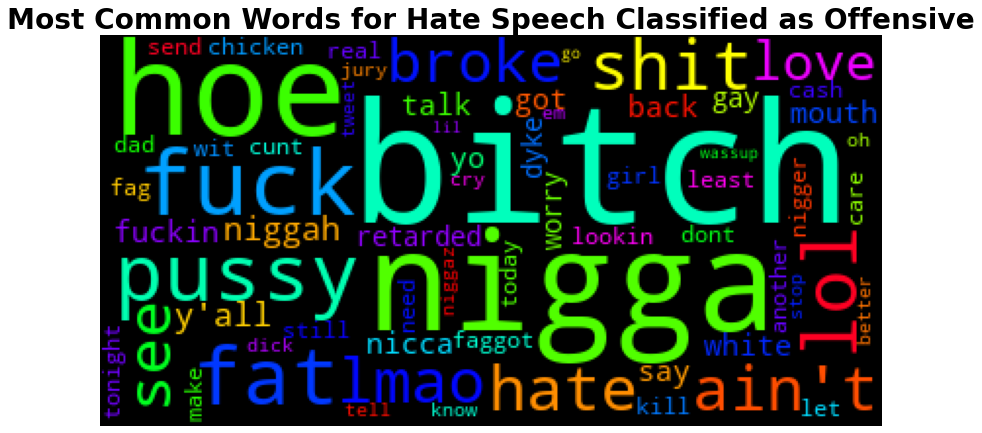

In [390]:
plot_wordcloud(hate_as_off_tokens, 'Hate Speech Classified as Offensive');

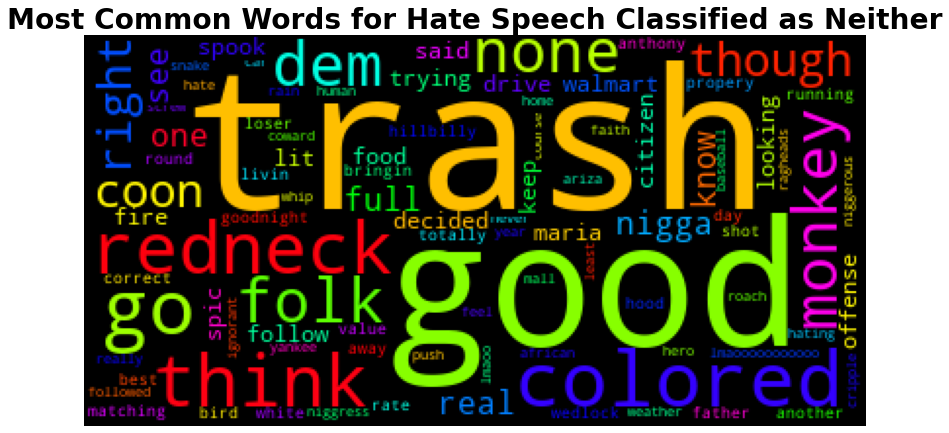

In [389]:
plot_wordcloud(hate_as_neither_tokens, 'Hate Speech Classified as Neither');

# Conclusions/Recommendations